Script to visualize gradients of weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, ideal model

In [13]:
def visualize_gradients(train_path, p, show = False, approx = False):
    plt.rcParams['font.size'] = 20
    np.random.seed(0xC0FFEE)
    num_tasks = 5
    num_grad_samples = 10

    fig, ax = plt.subplots(num_tasks, num_grad_samples, figsize = (4*num_grad_samples, 4*num_tasks))
    sample_indices = np.random.choice(np.arange(100), size = num_grad_samples)

    for task in range(num_tasks):
        if not approx:
            input_layer_grad = np.load(f'{train_path}/task_{task}/grad_layers.0.weight.npy')
        else:
            input_layer_grad = np.load(f'{train_path}/ideal_grad_task_{task}/grad_layers.0.weight.npy')
        #output_layer_grad = np.load(f'{train_path}/task_{task}/grad_output_layer.weight.npy')

        #print(input_layer_grad.shape) should be 100 by 784
        #print(output_layer_grad.shape) should be 10 by 100

        # just plot samples 
        for i, grad_index in enumerate(sample_indices):
            hidden_first_node_weights = np.reshape(input_layer_grad[grad_index], (28, 28))
            ax[task, i].imshow(hidden_first_node_weights)
            ax[task, i].axes.xaxis.set_ticks([])
            ax[task, i].axes.yaxis.set_ticks([])

        for task in range(num_tasks):
            ax[task, 0].set_ylabel(f'Task {task}')
        for sample in range(num_grad_samples):
            ax[-1, sample].set_xlabel(f'Sample {sample}')
    fig.suptitle(f'Sample input layer gradients for p = {p} training')
    plt.tight_layout()
    if not approx:
        plt.savefig(f'grad_visualization/sample_{p}_train.png')
    else:
        plt.savefig(f'grad_visualization/sample_{p}_eval.png')

    if show:
        plt.show()

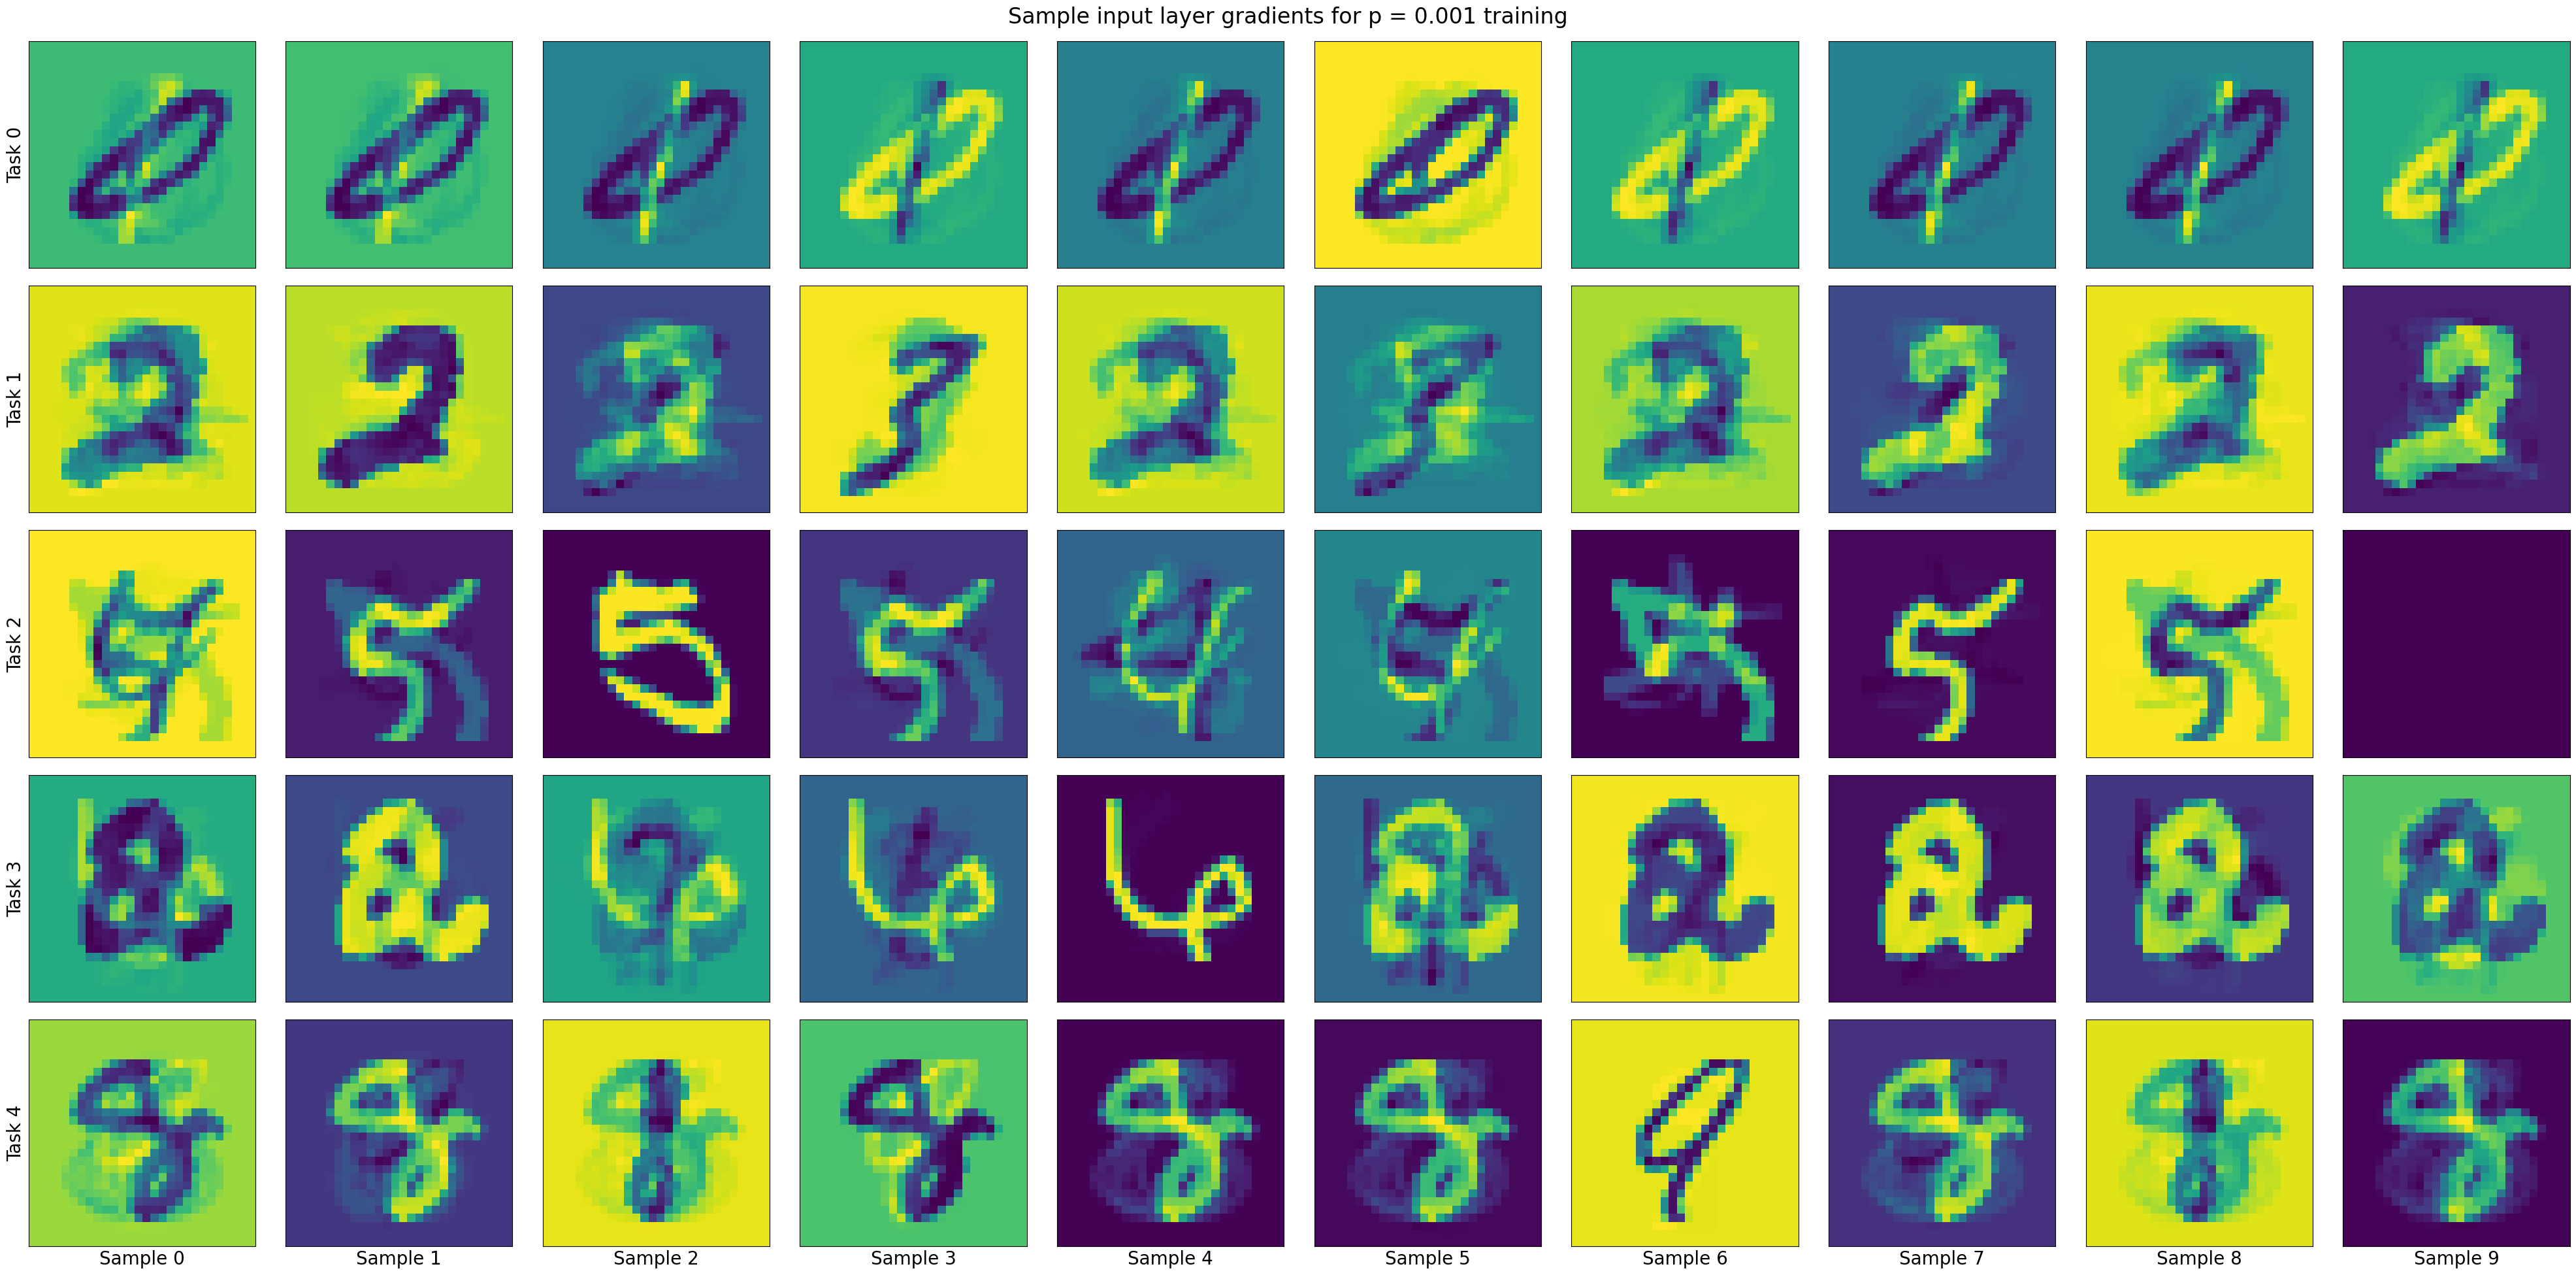

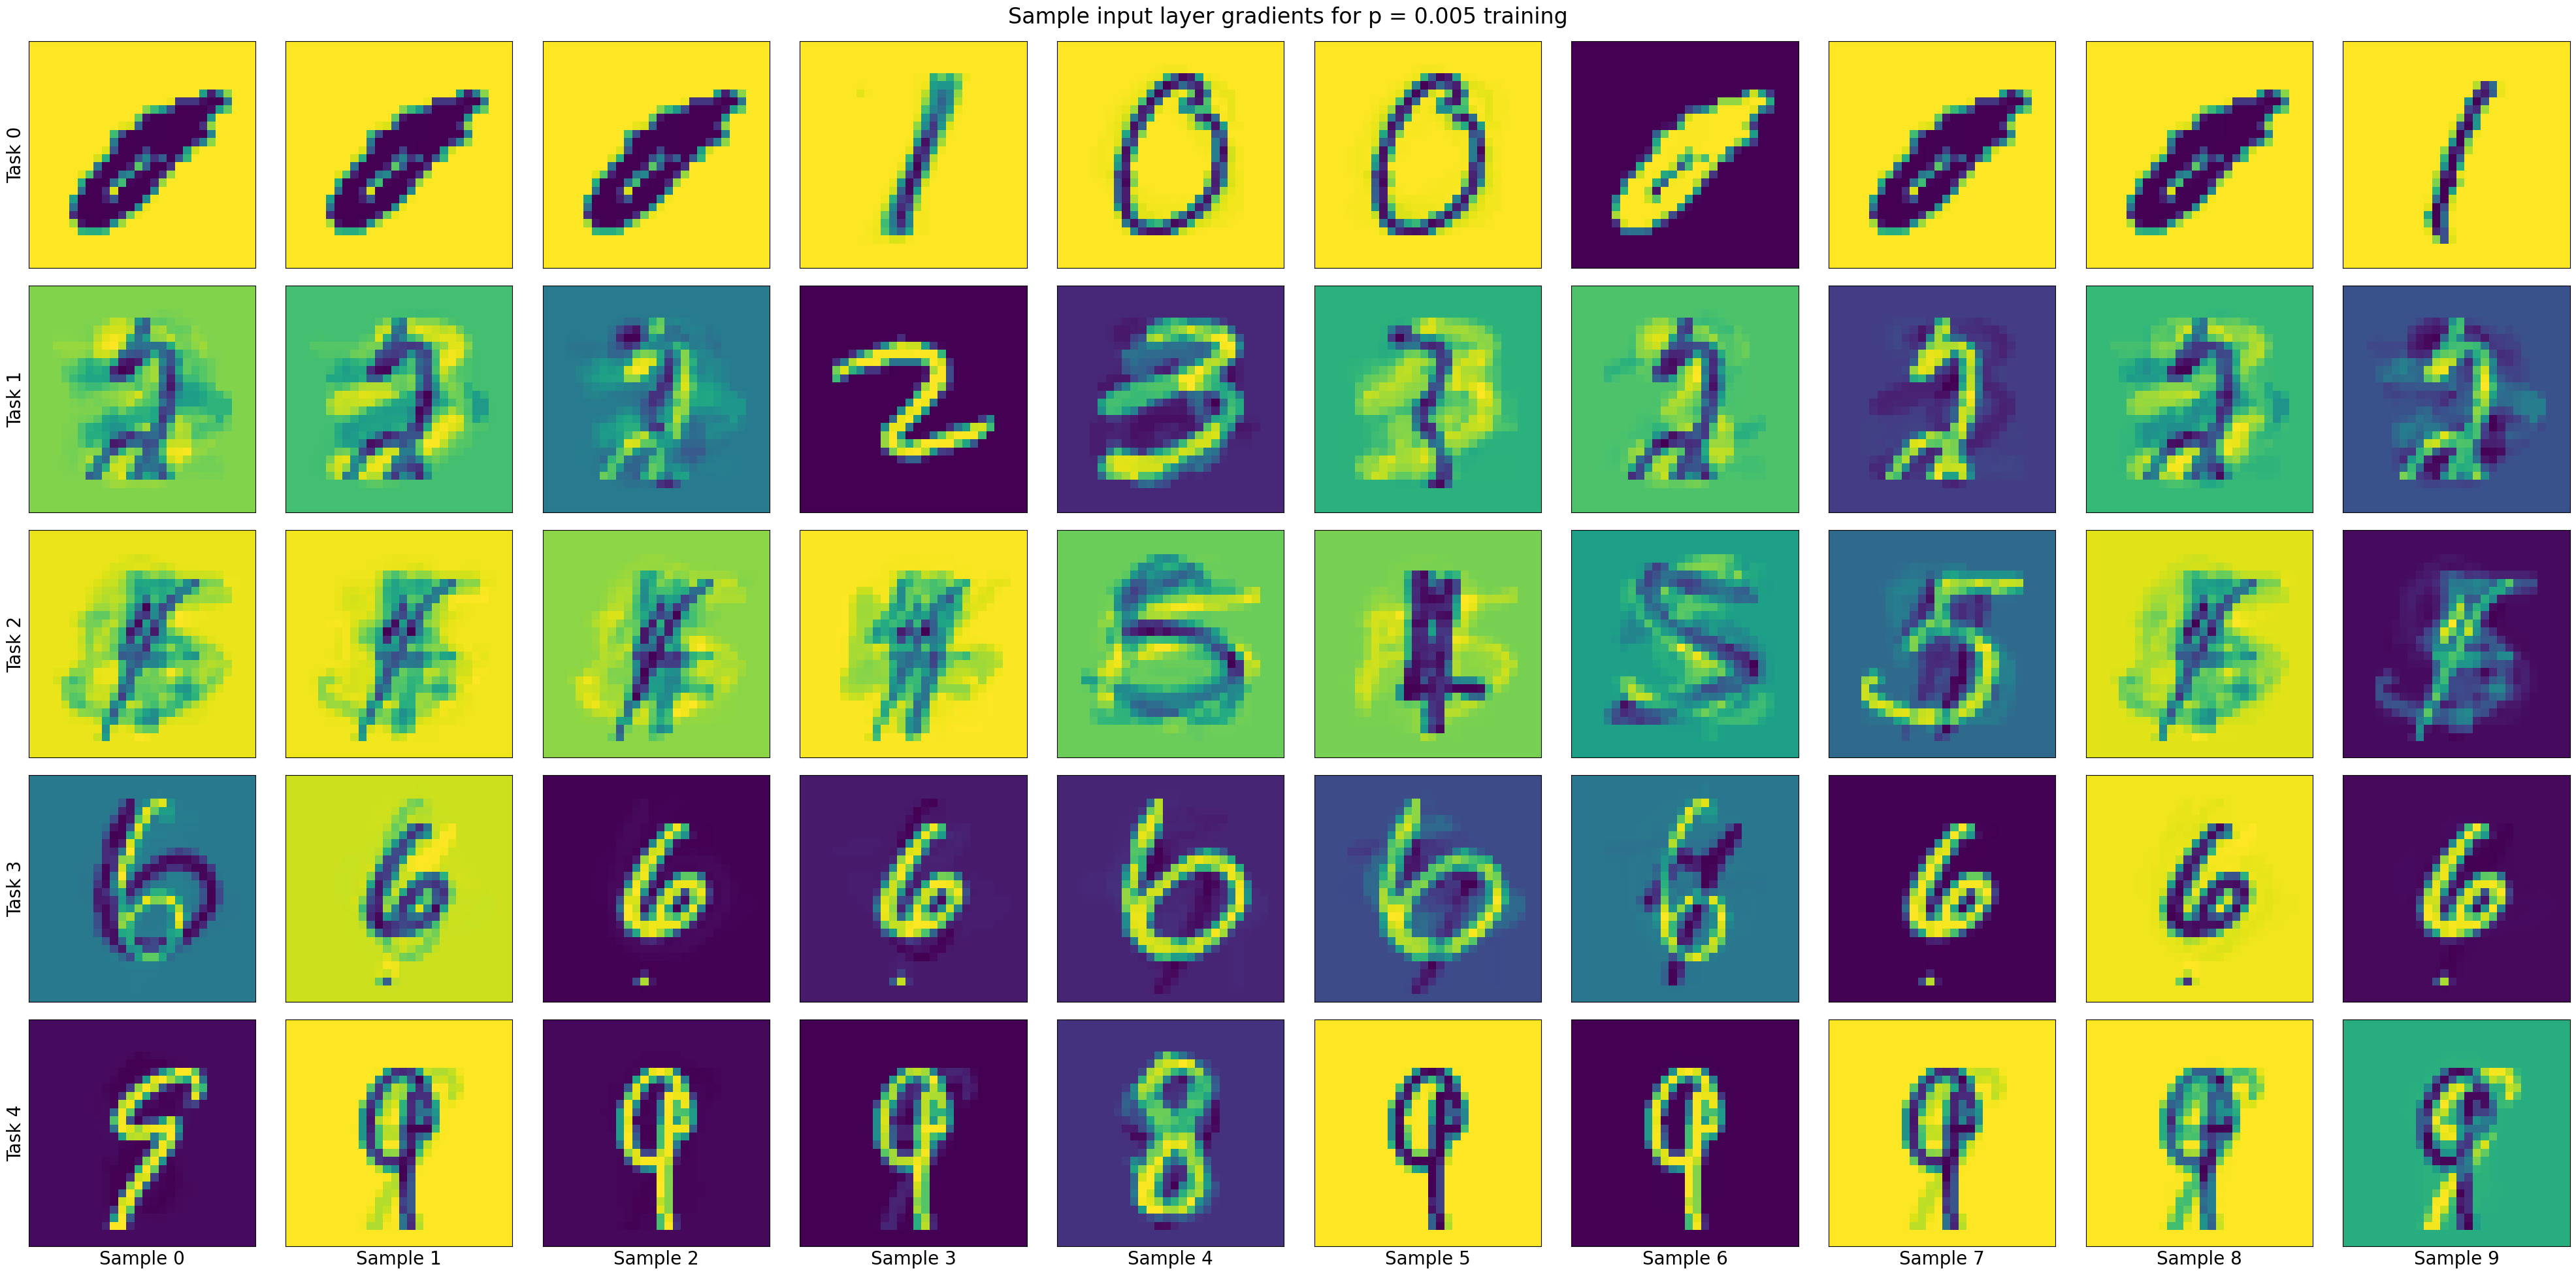

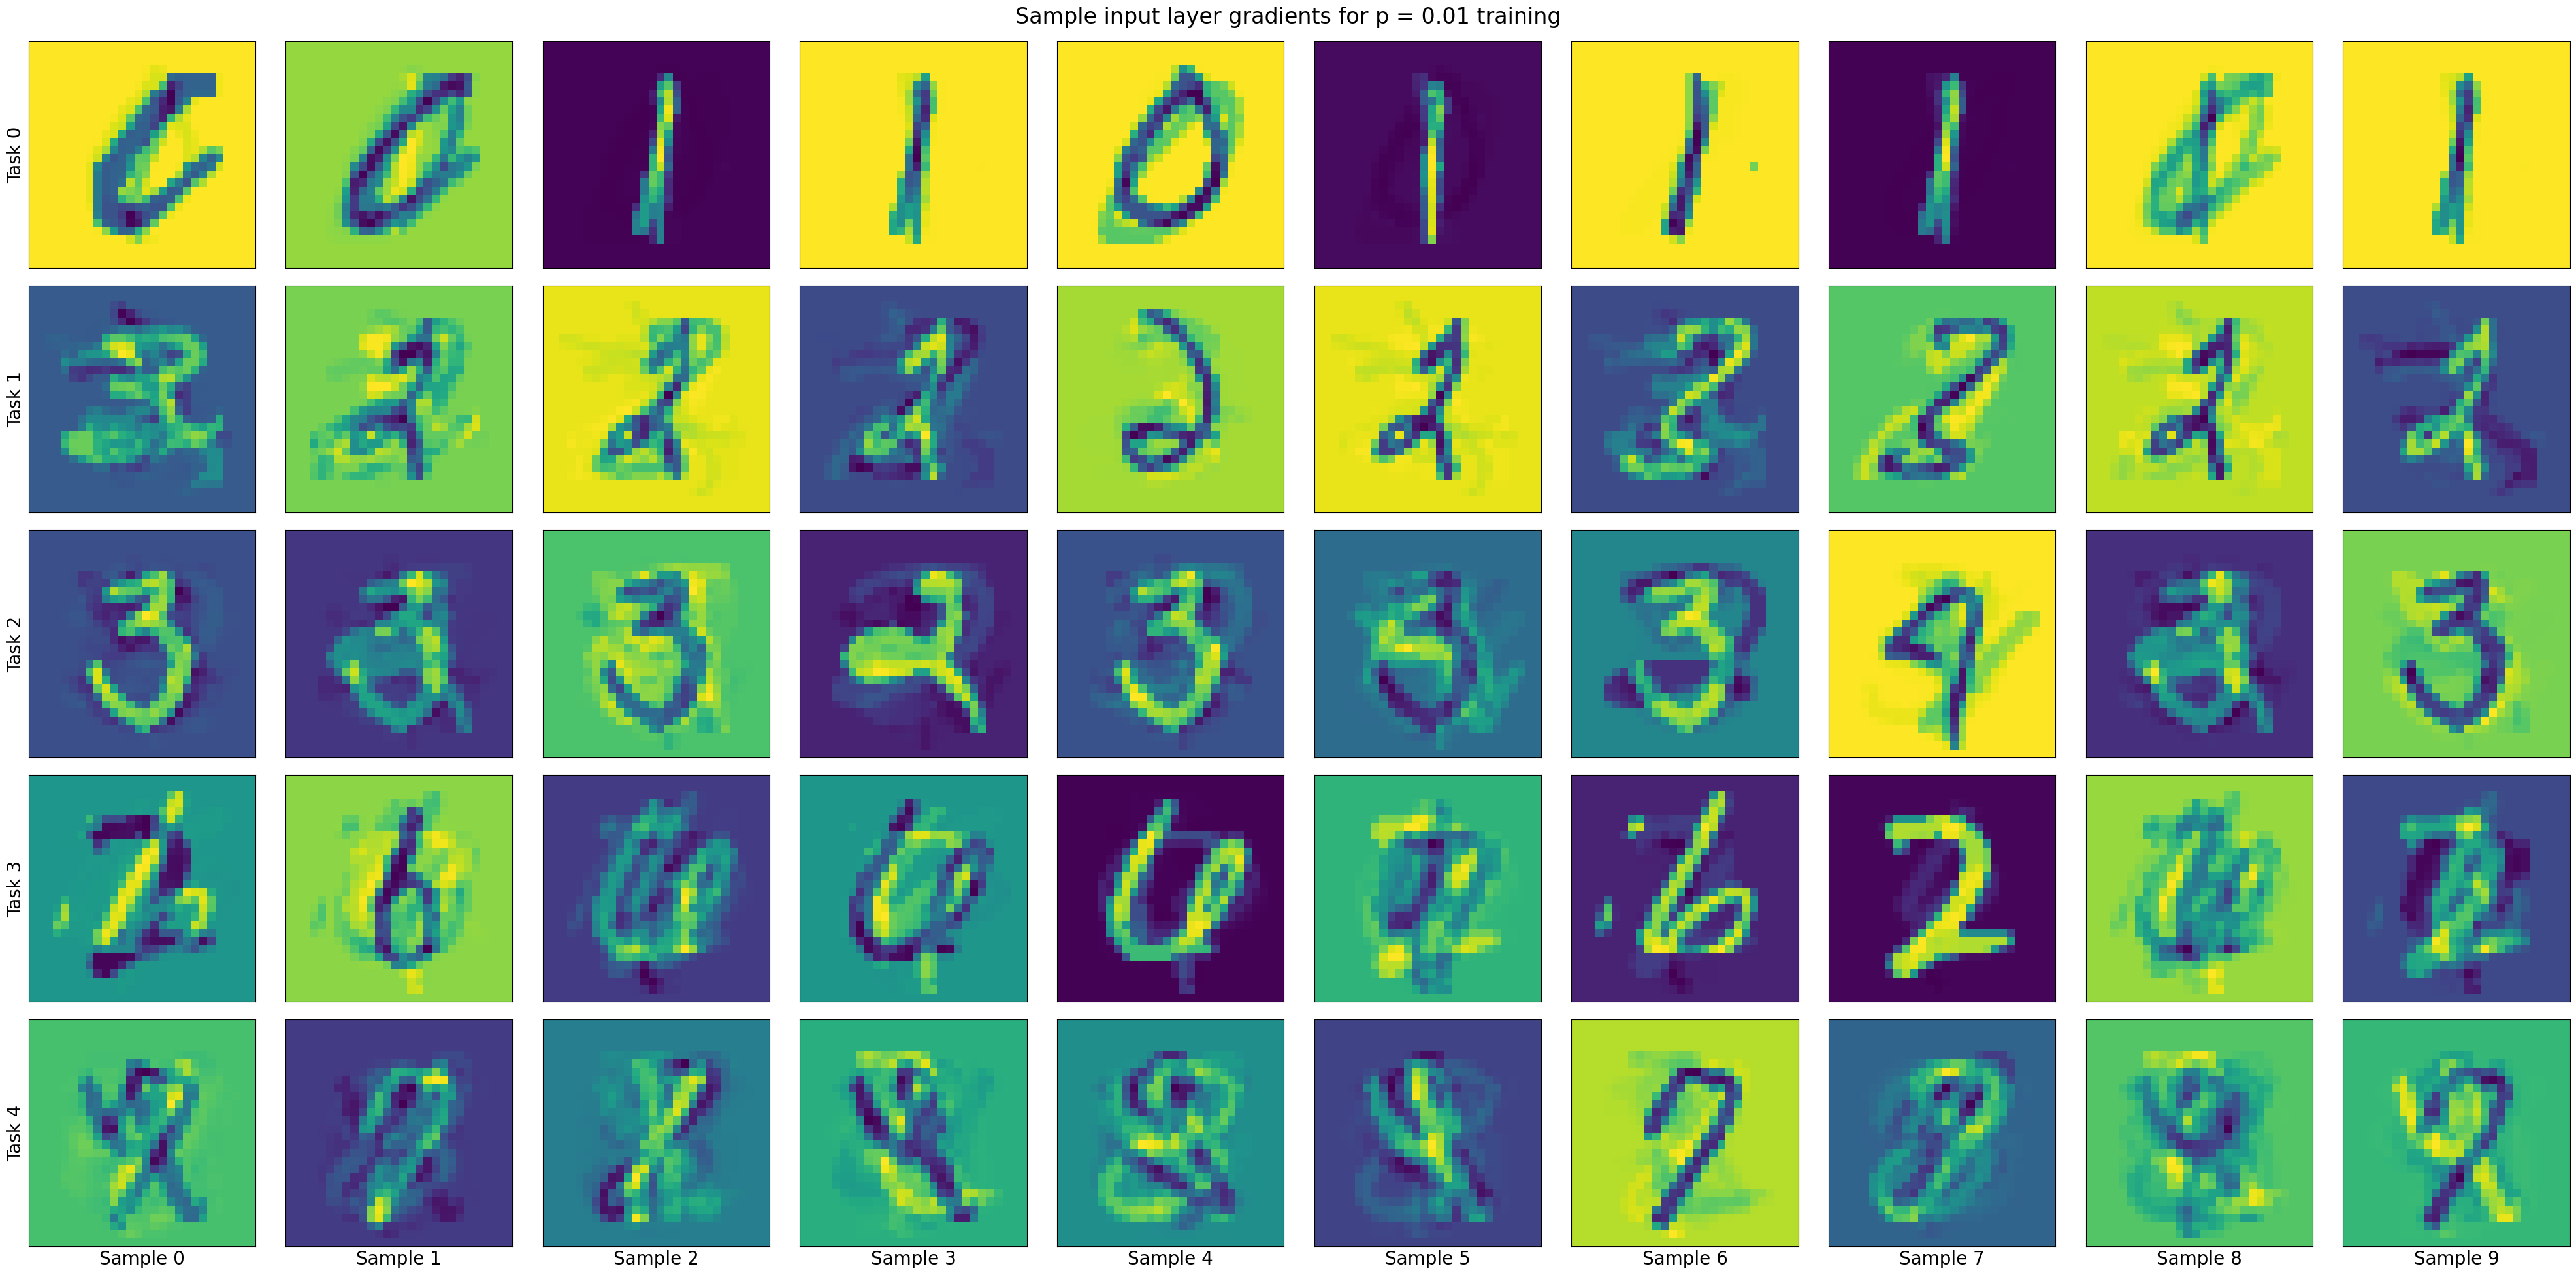

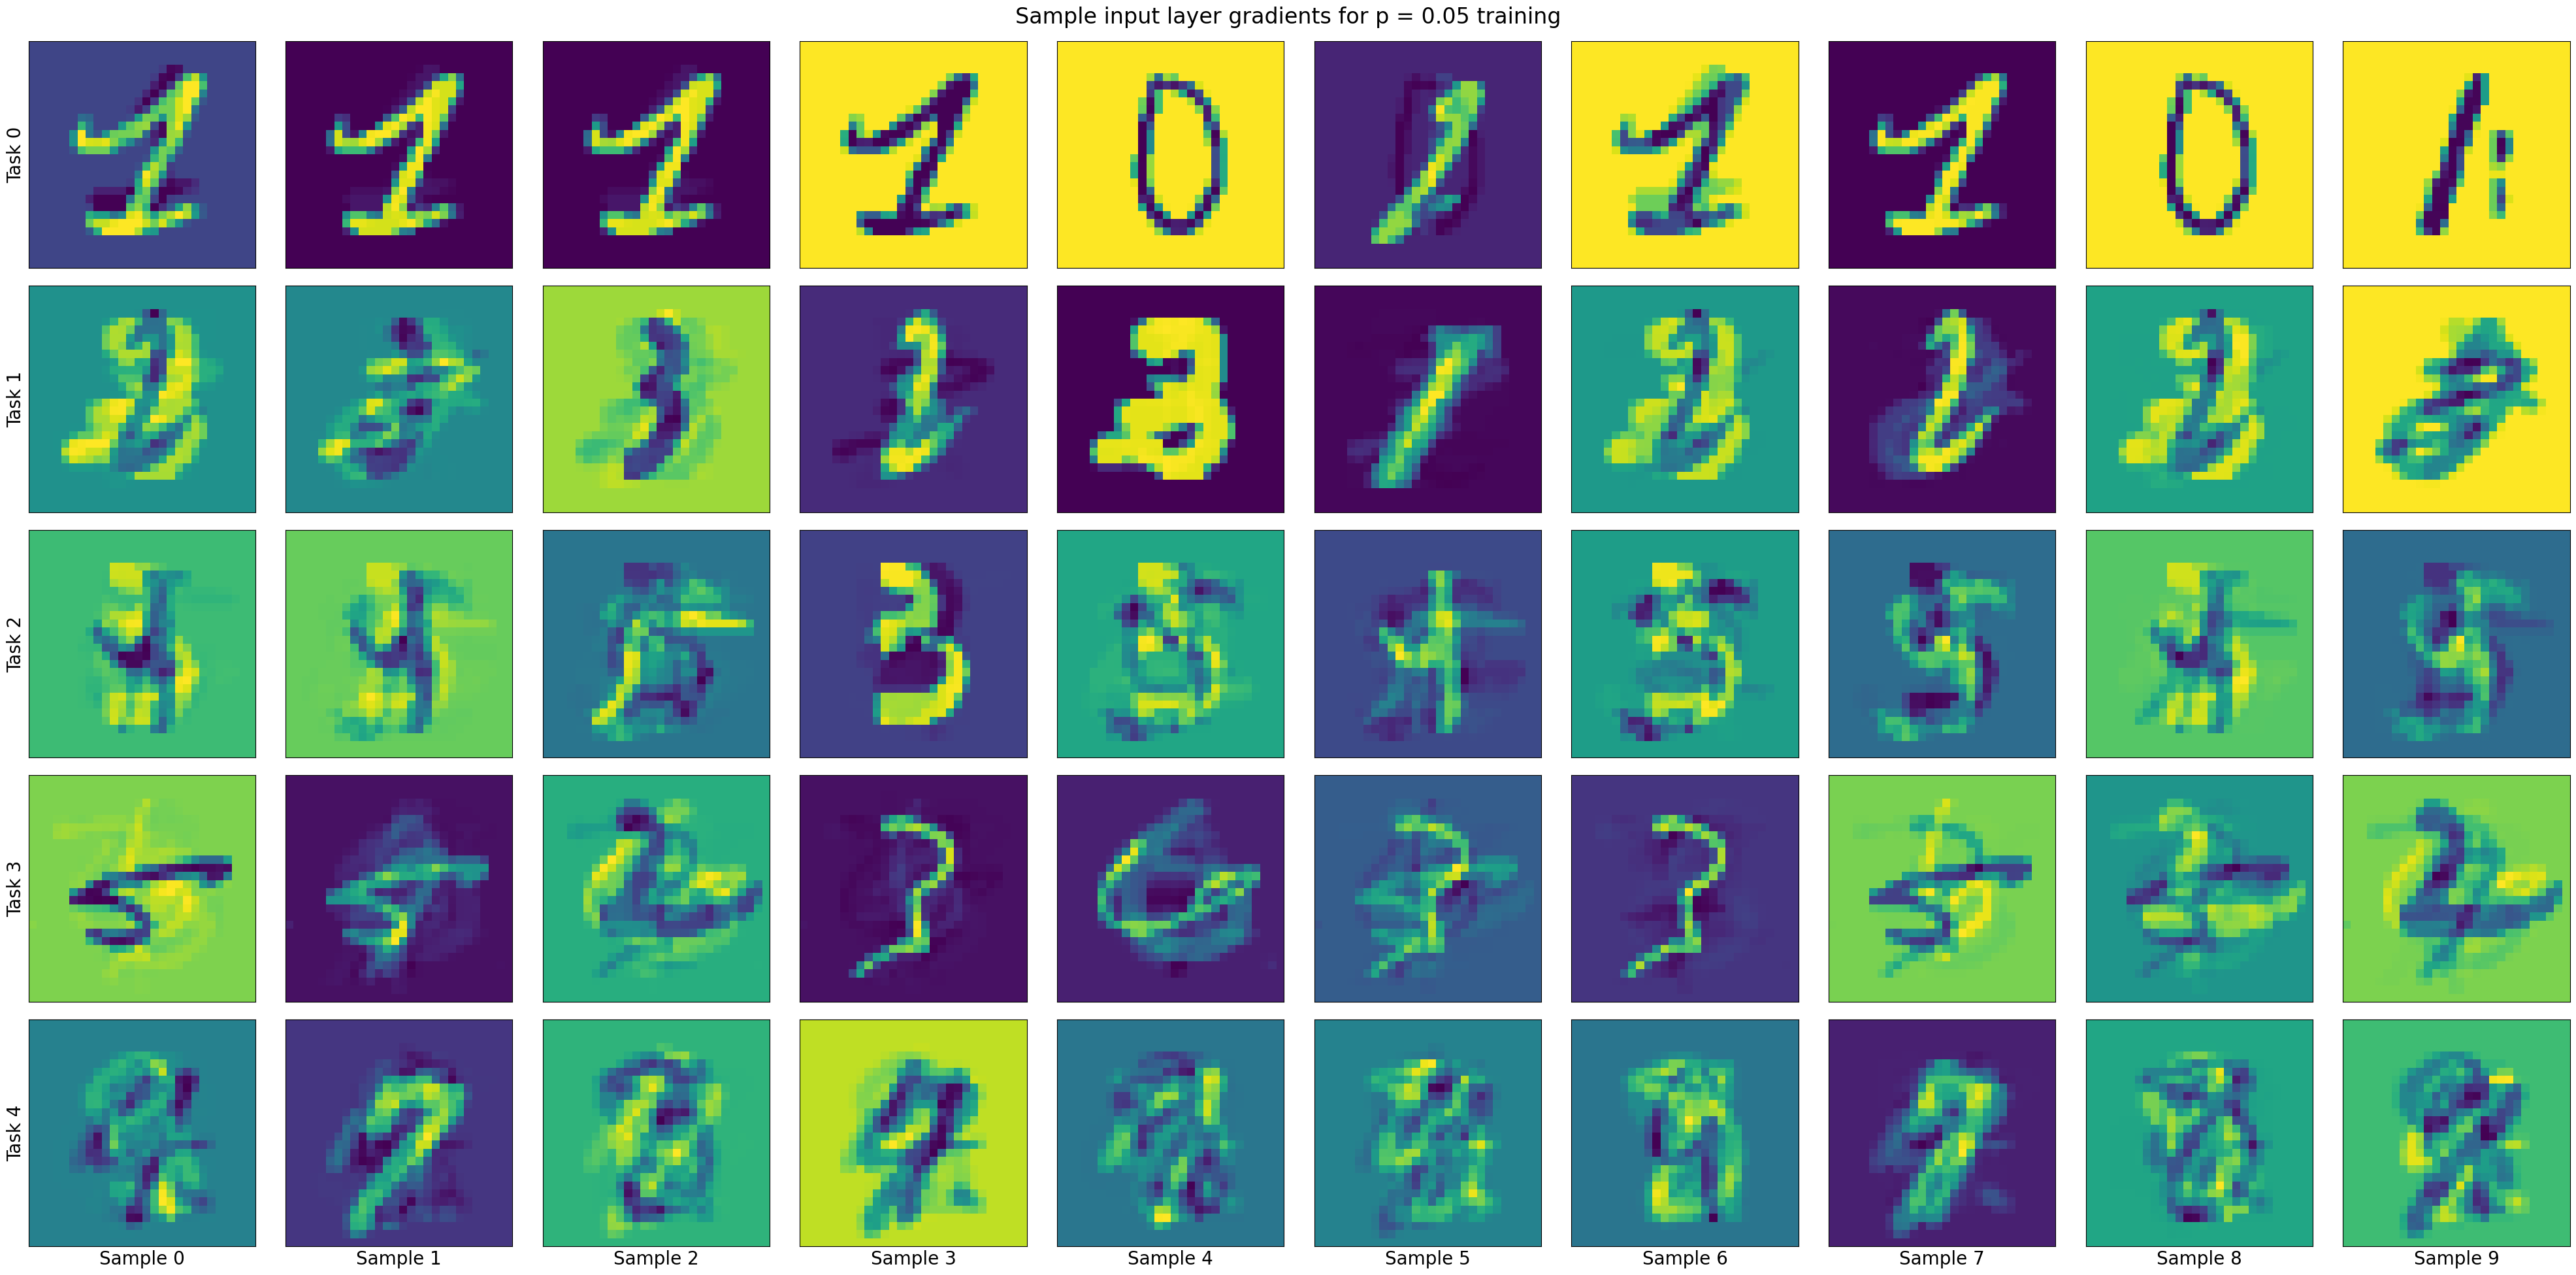

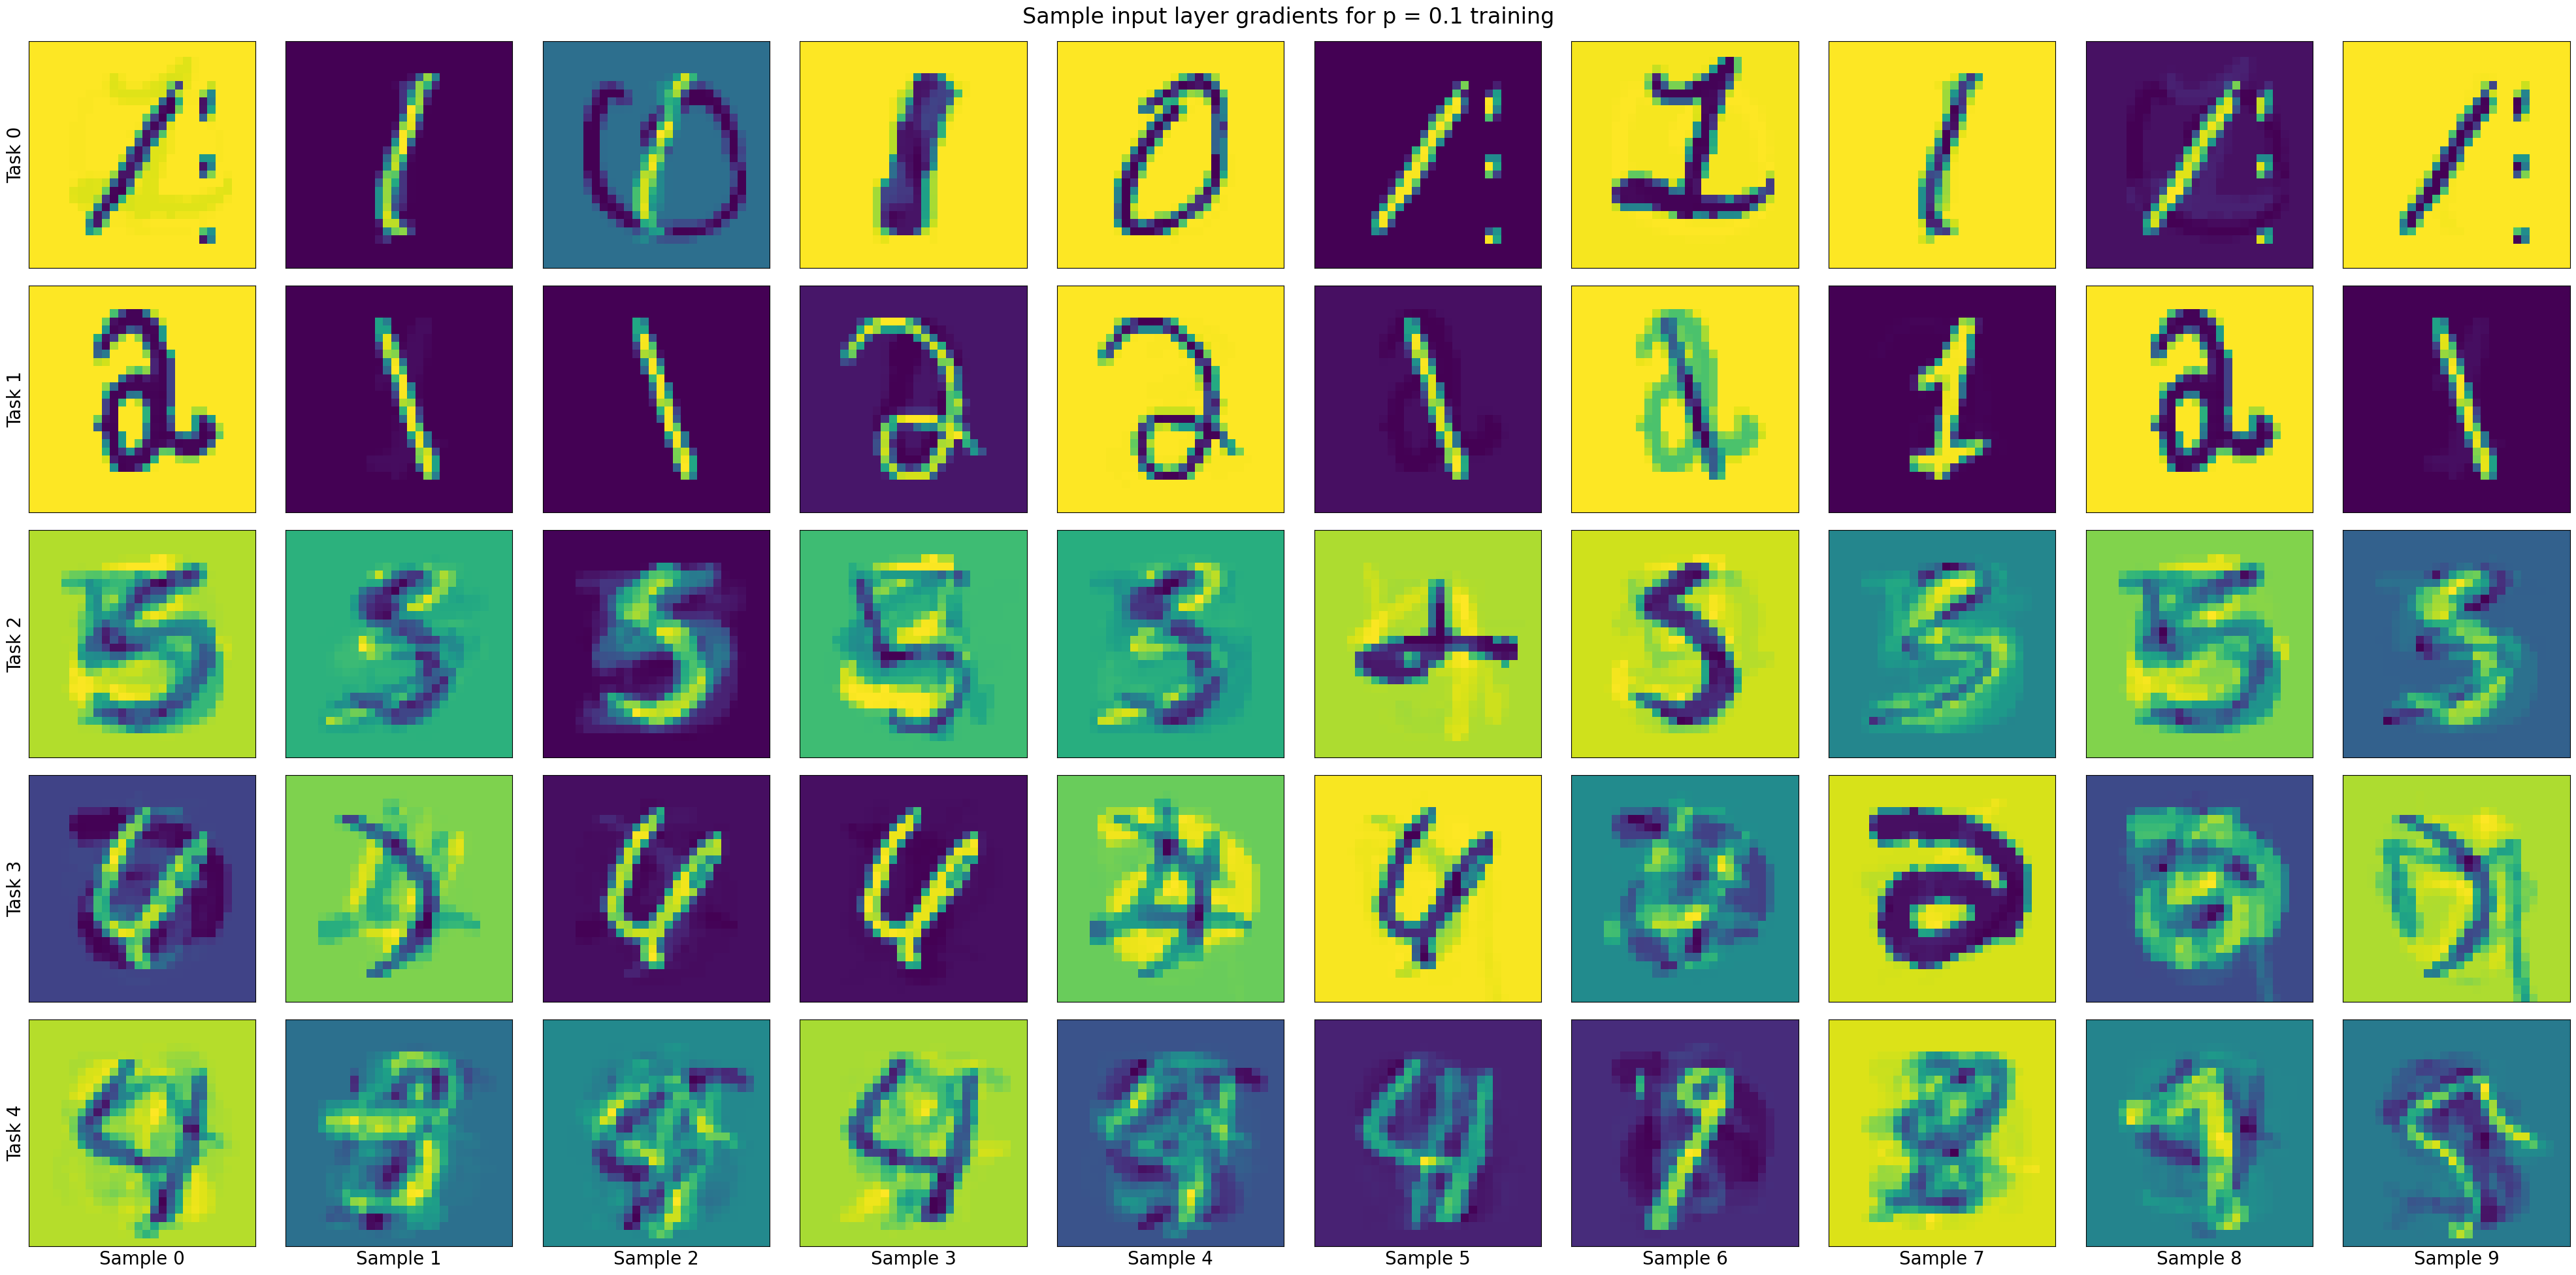

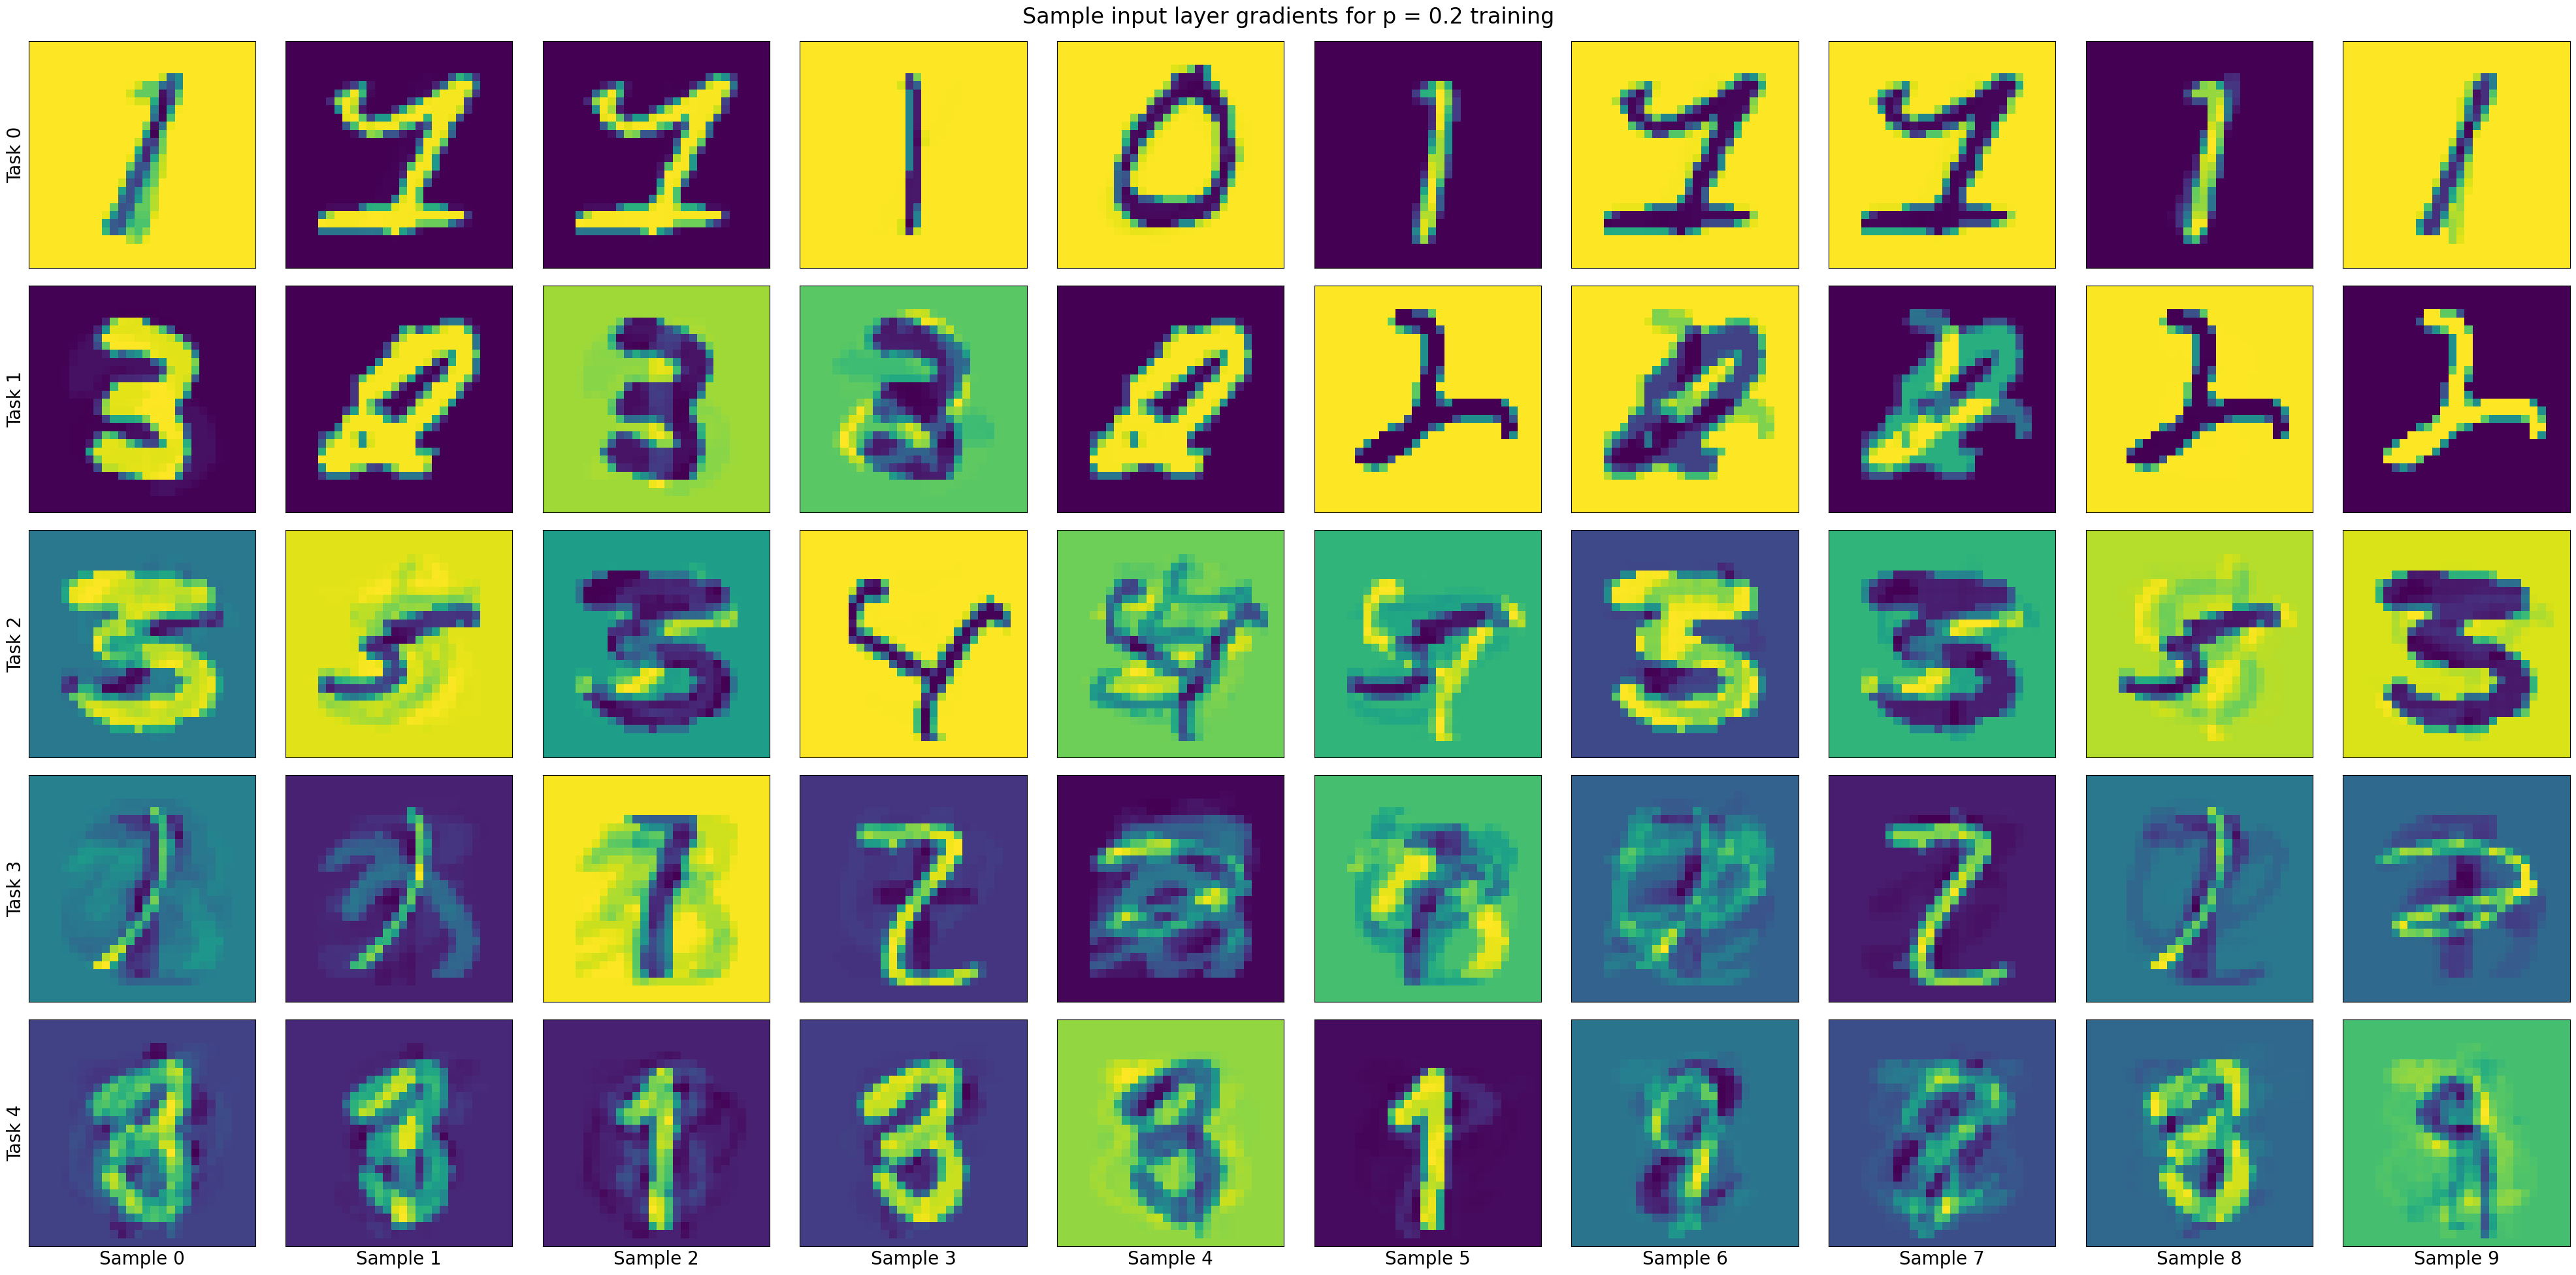

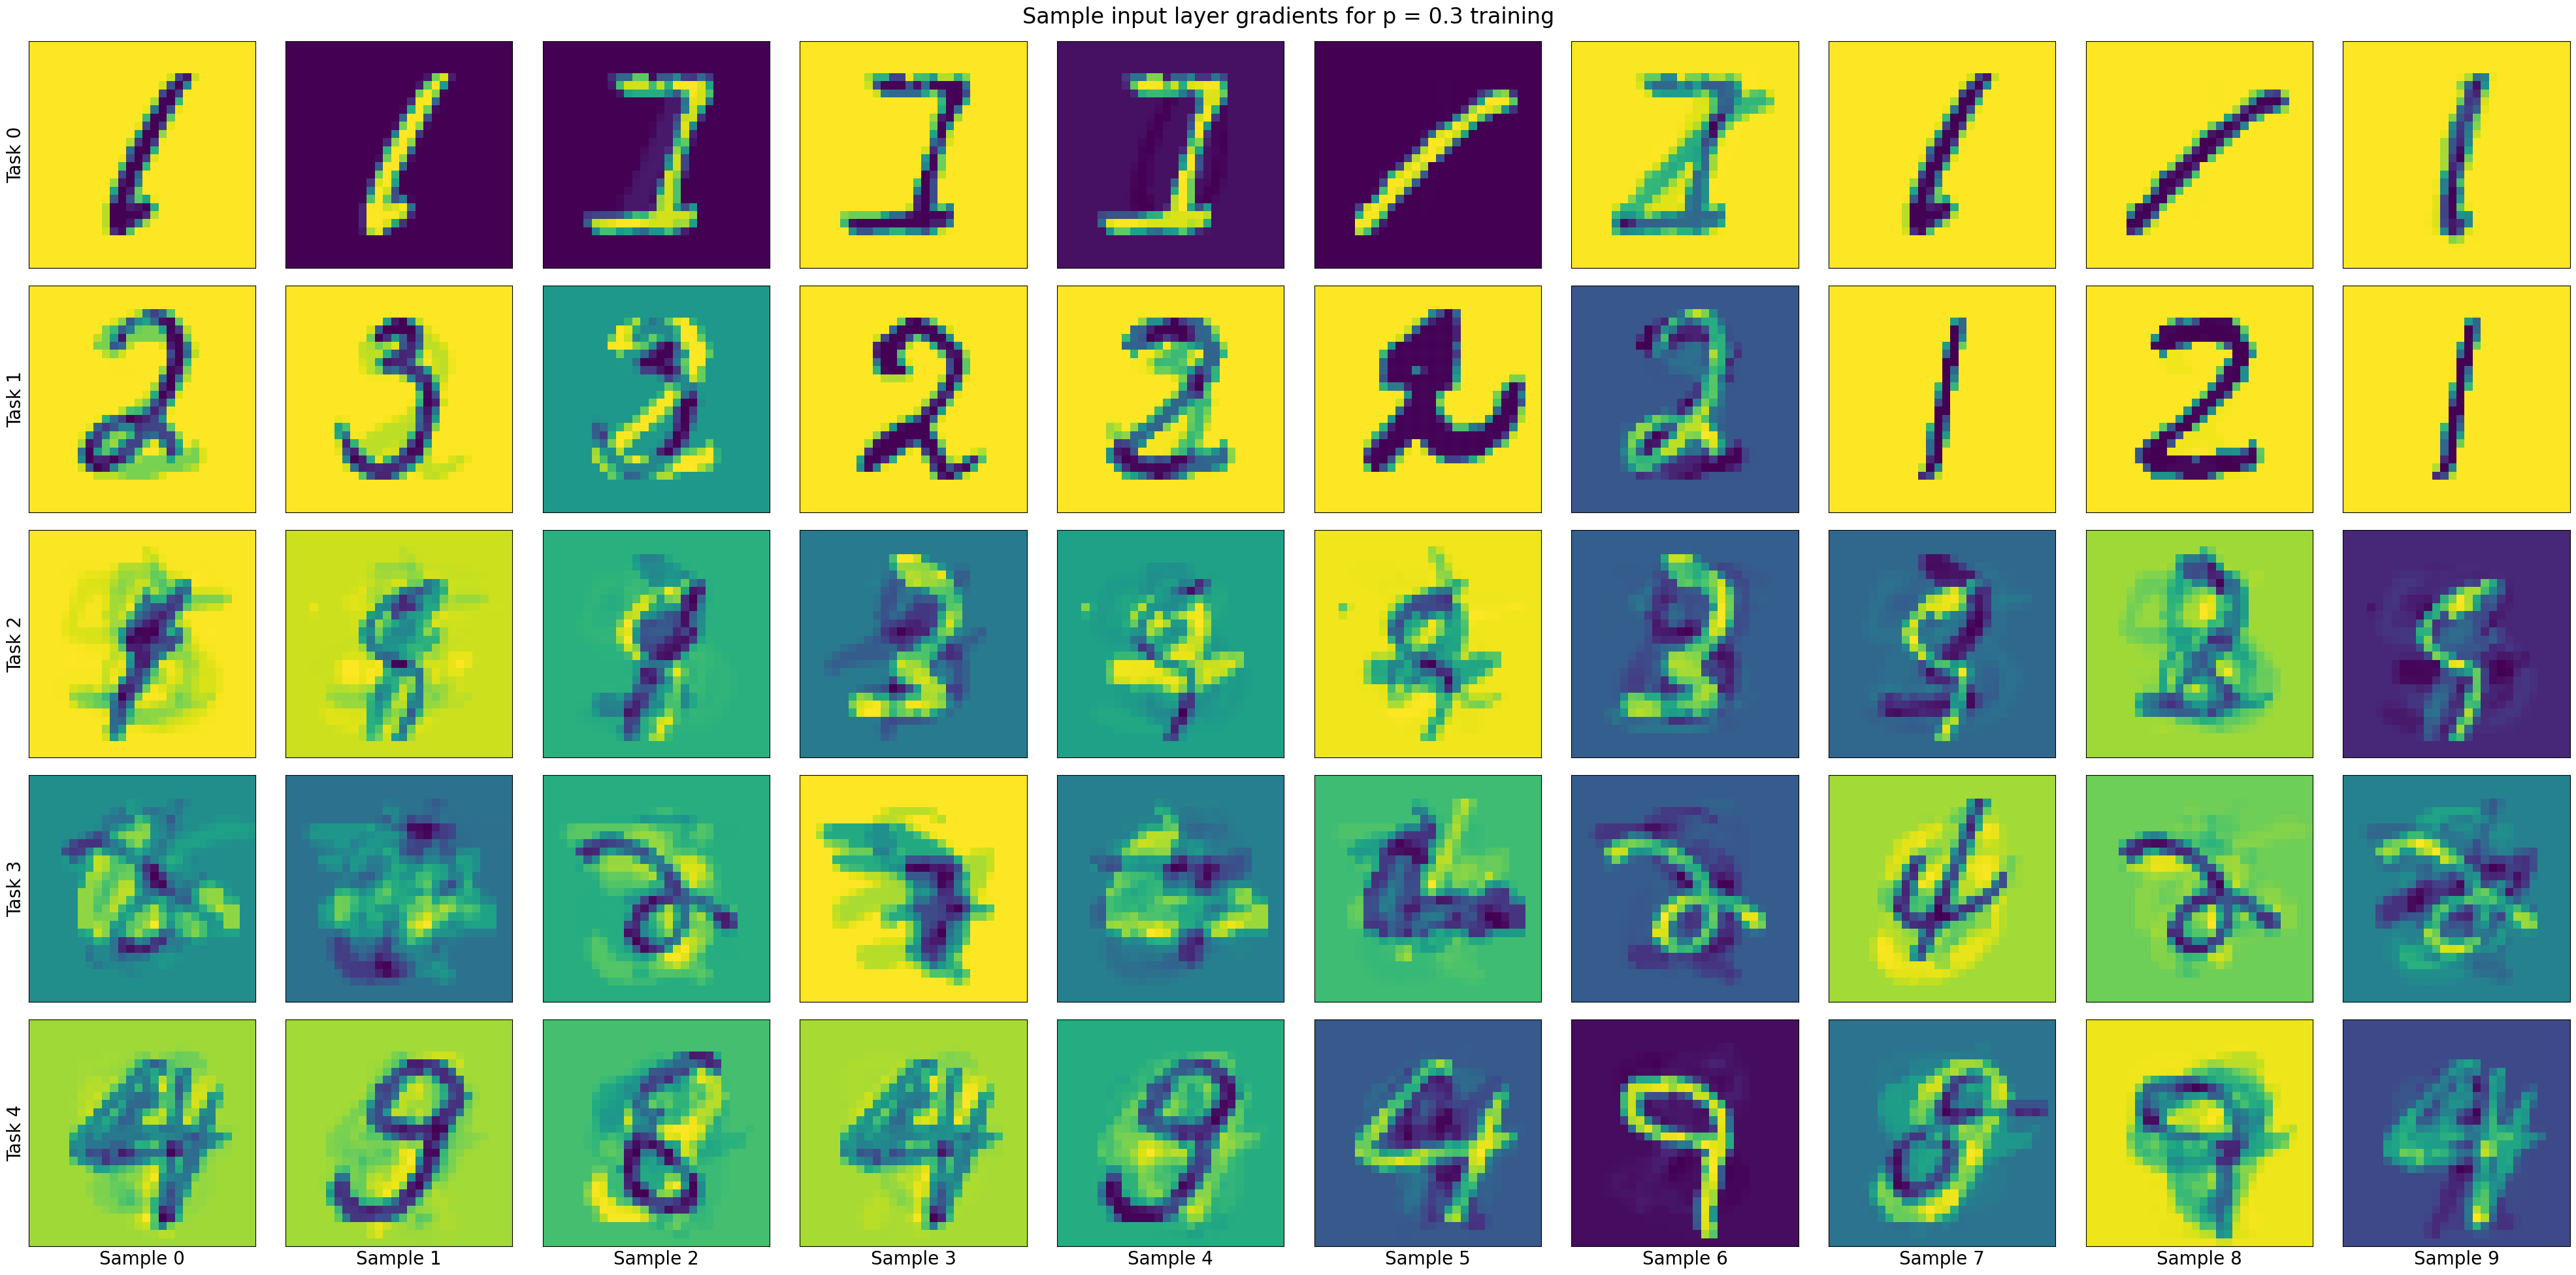

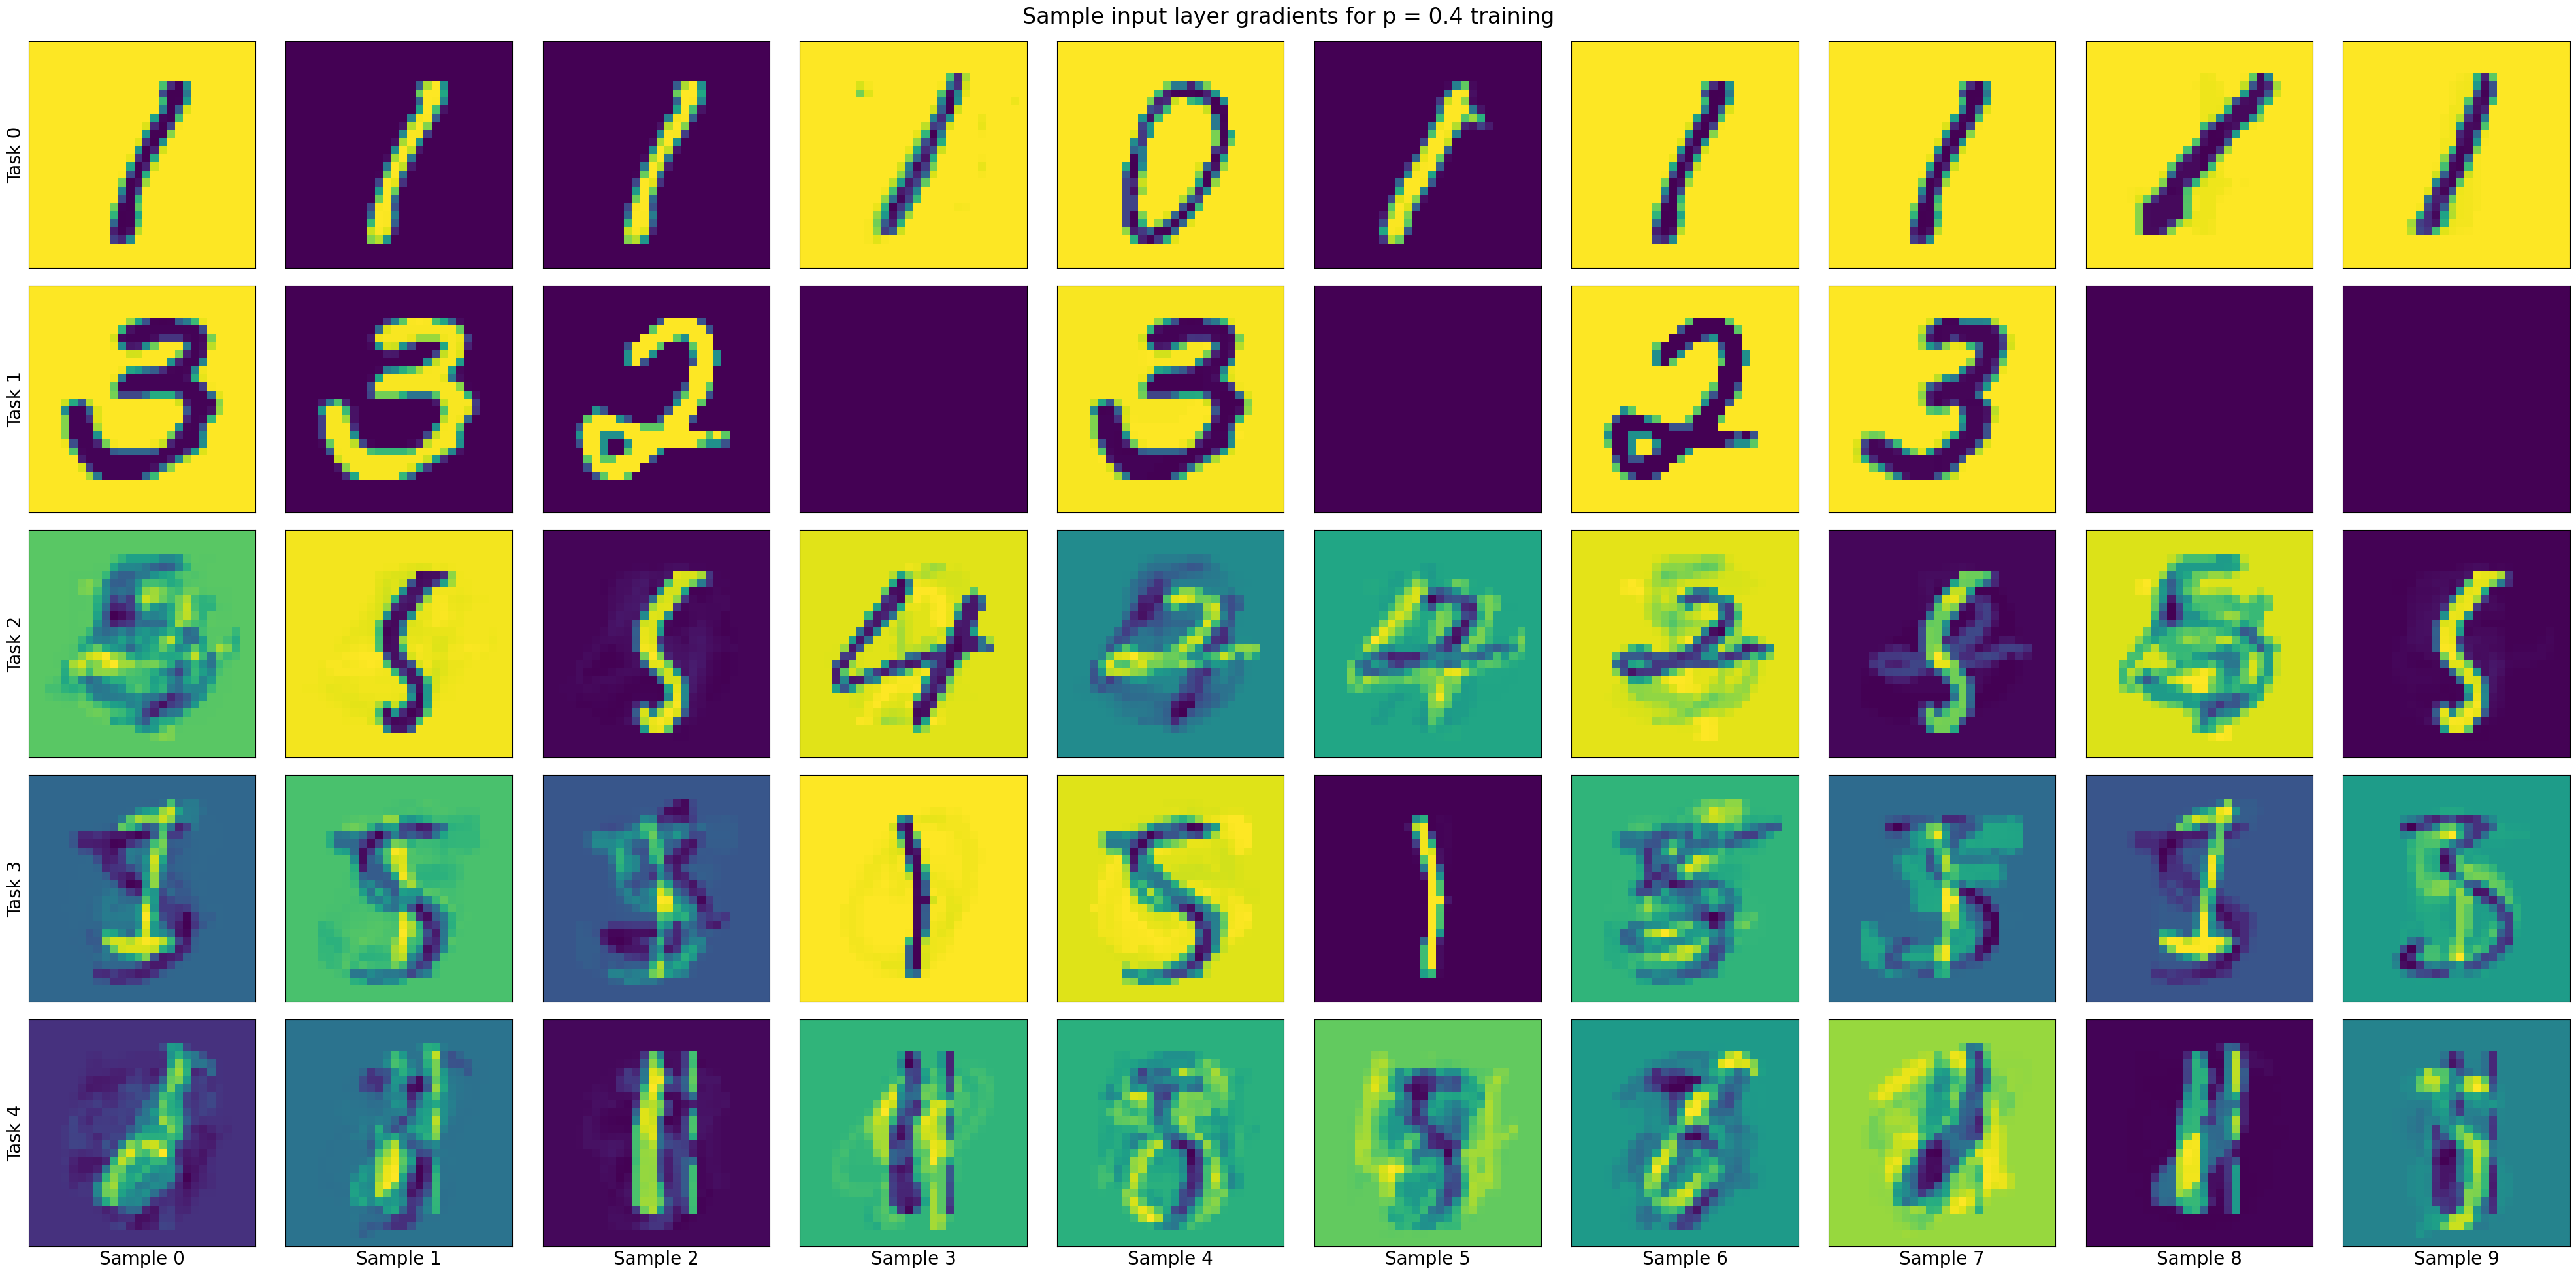

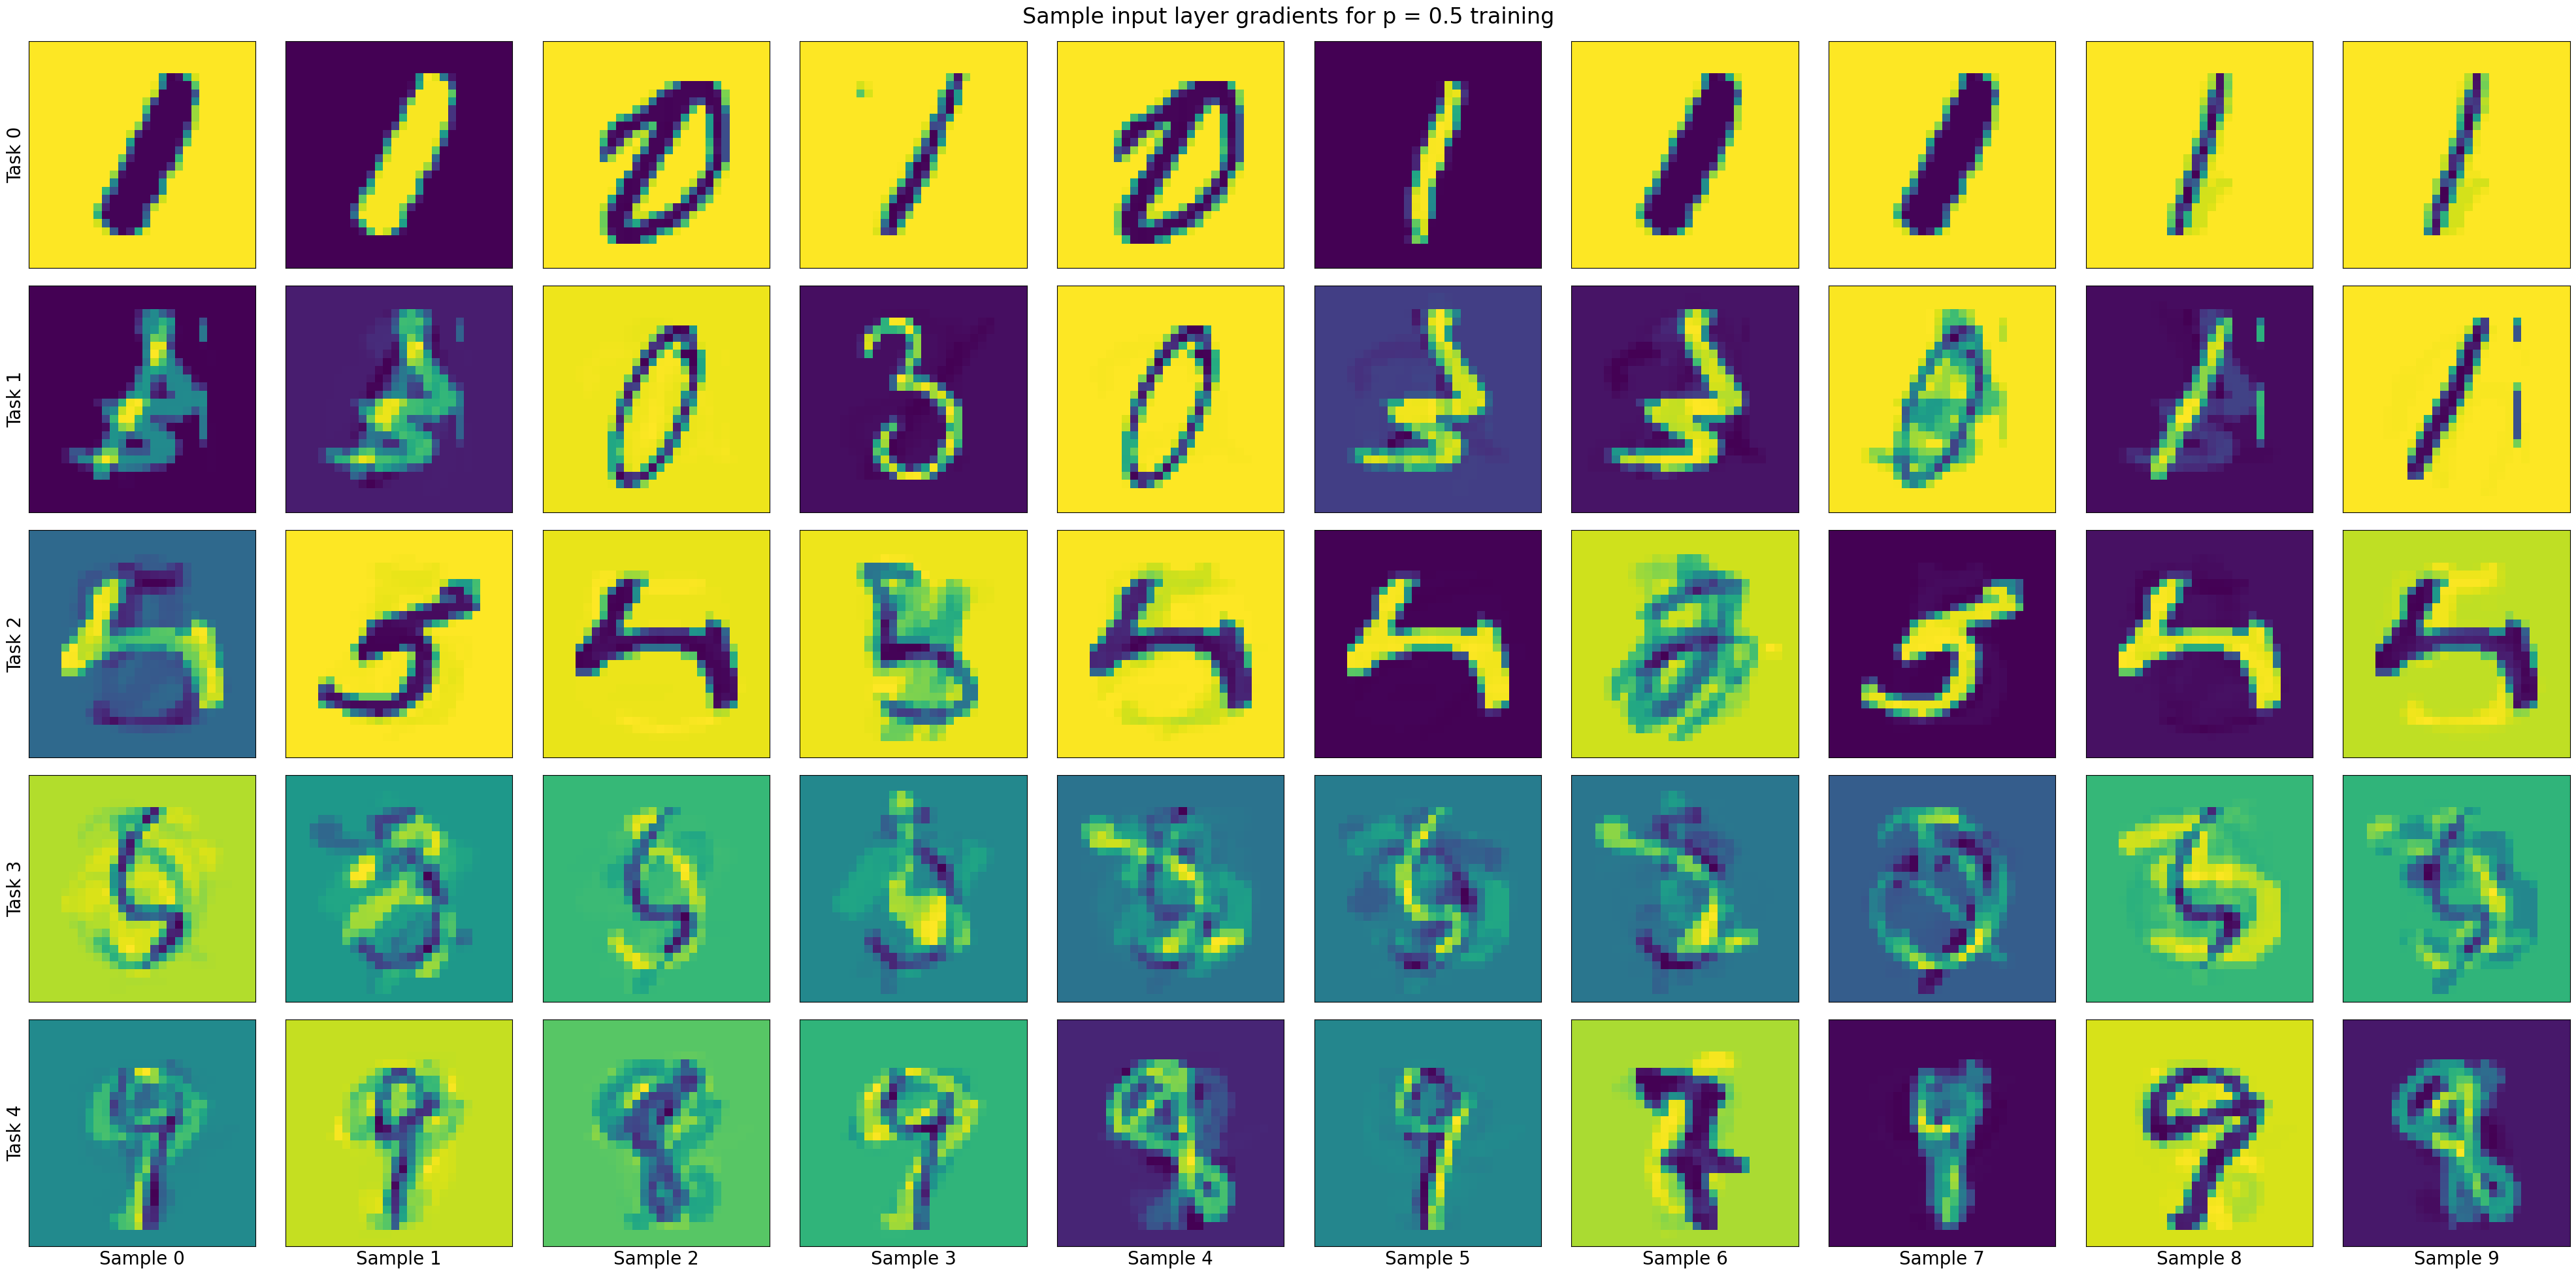

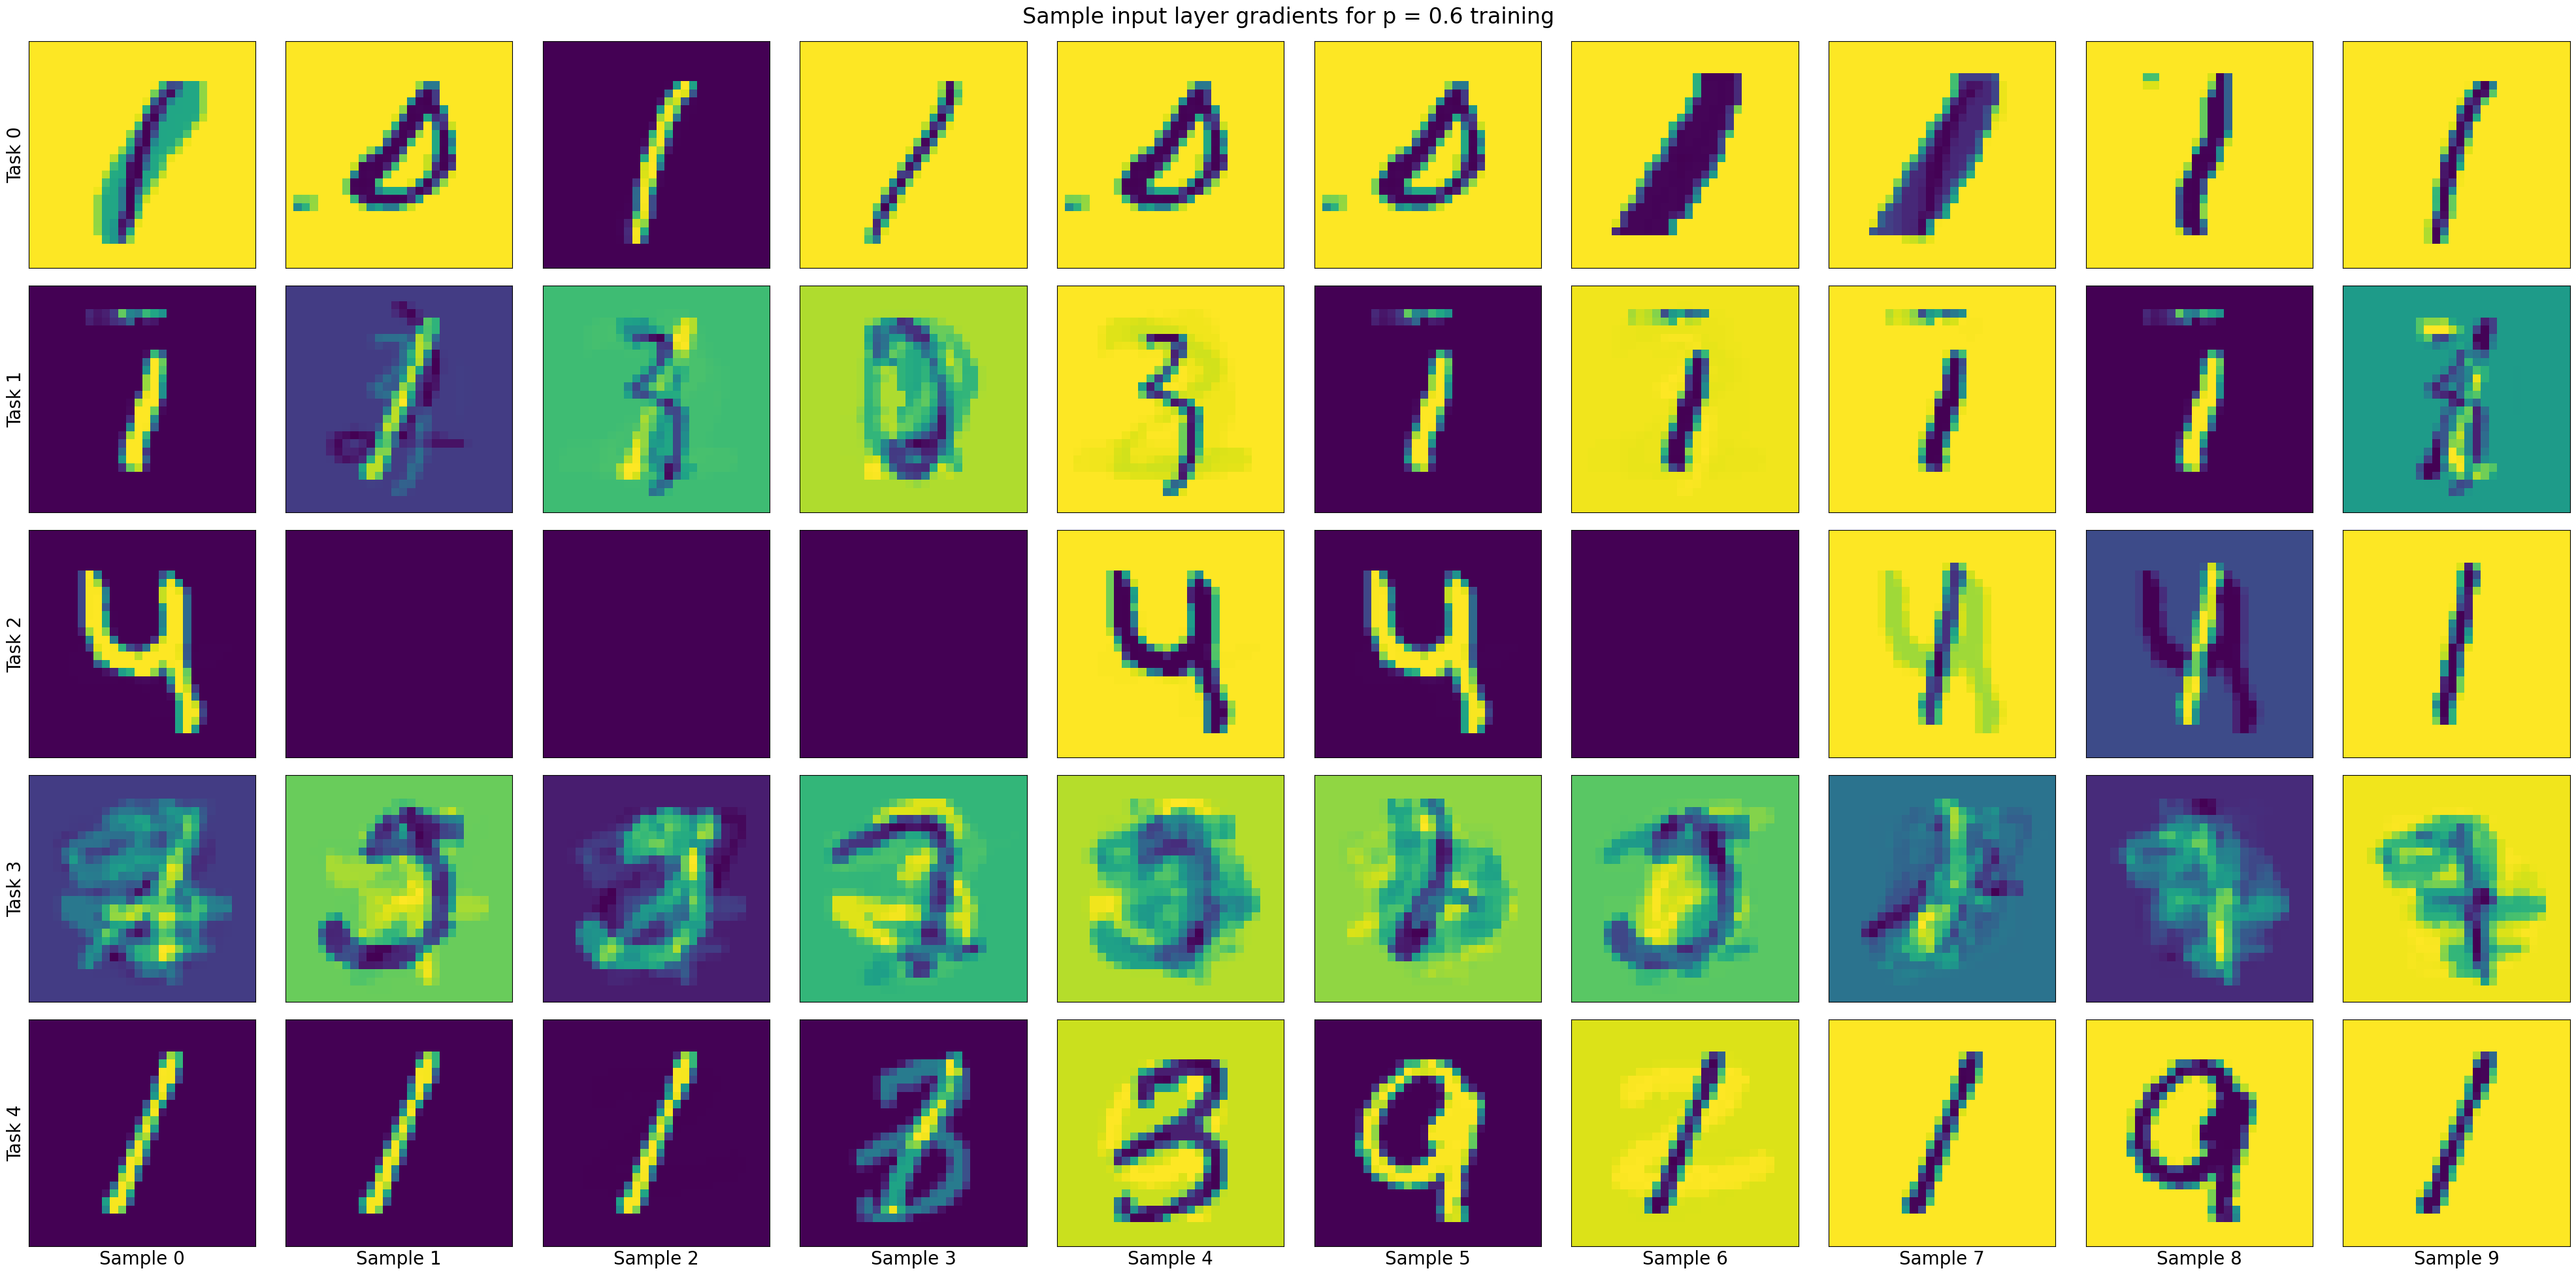

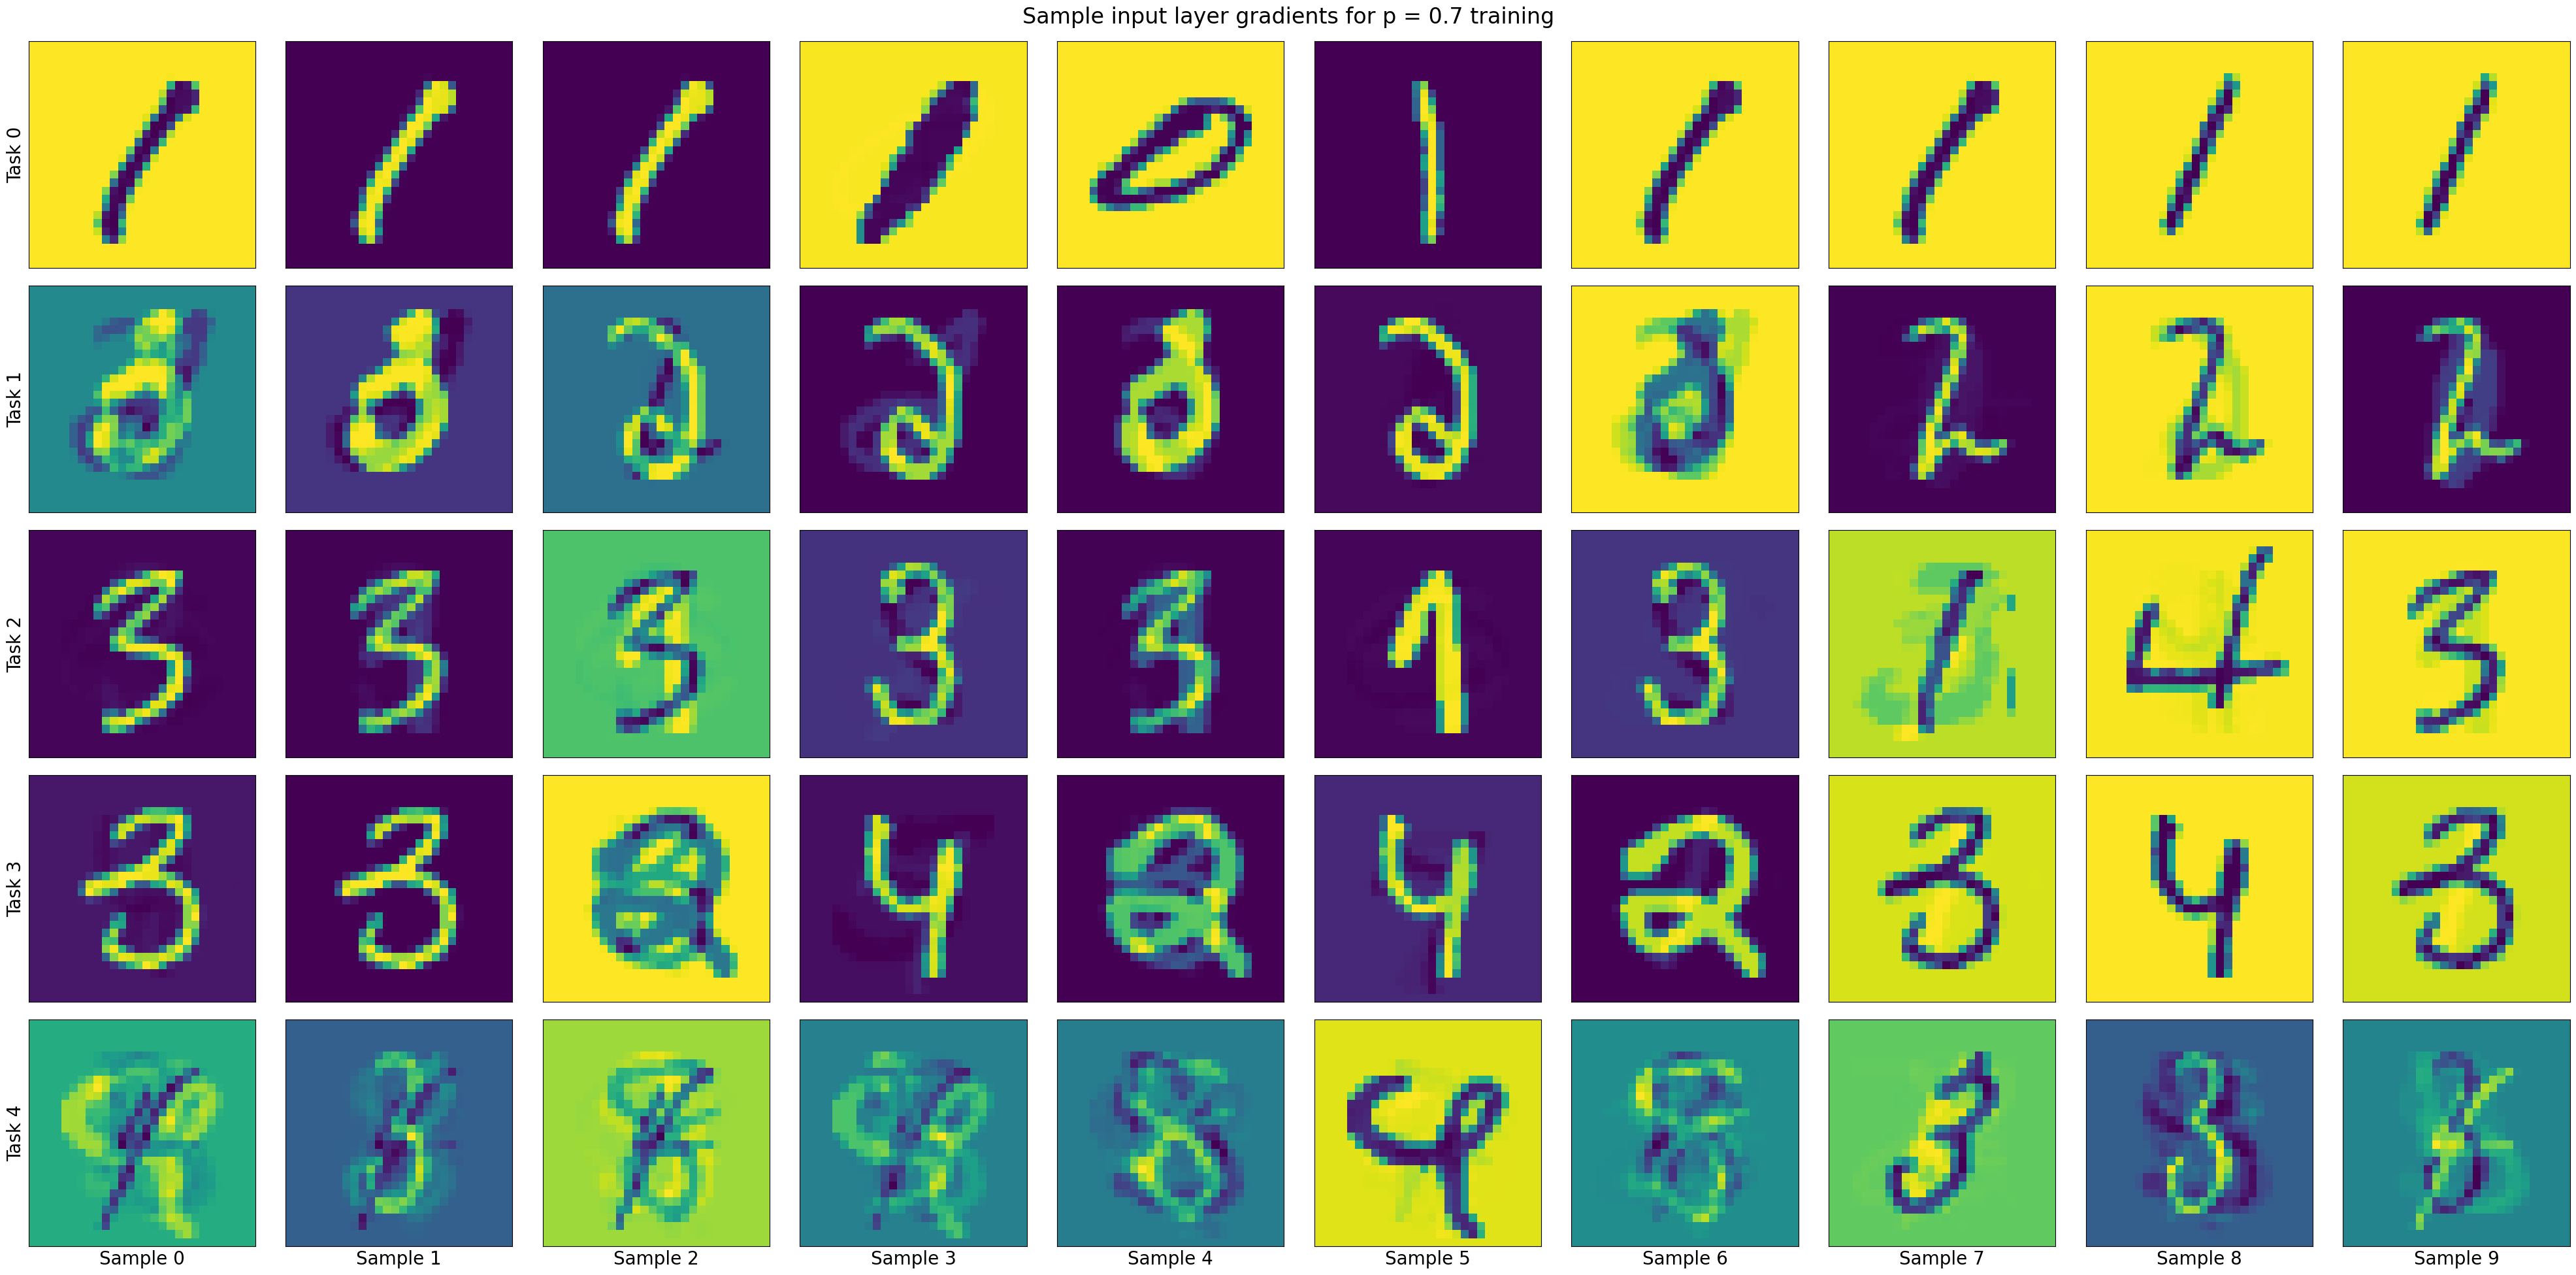

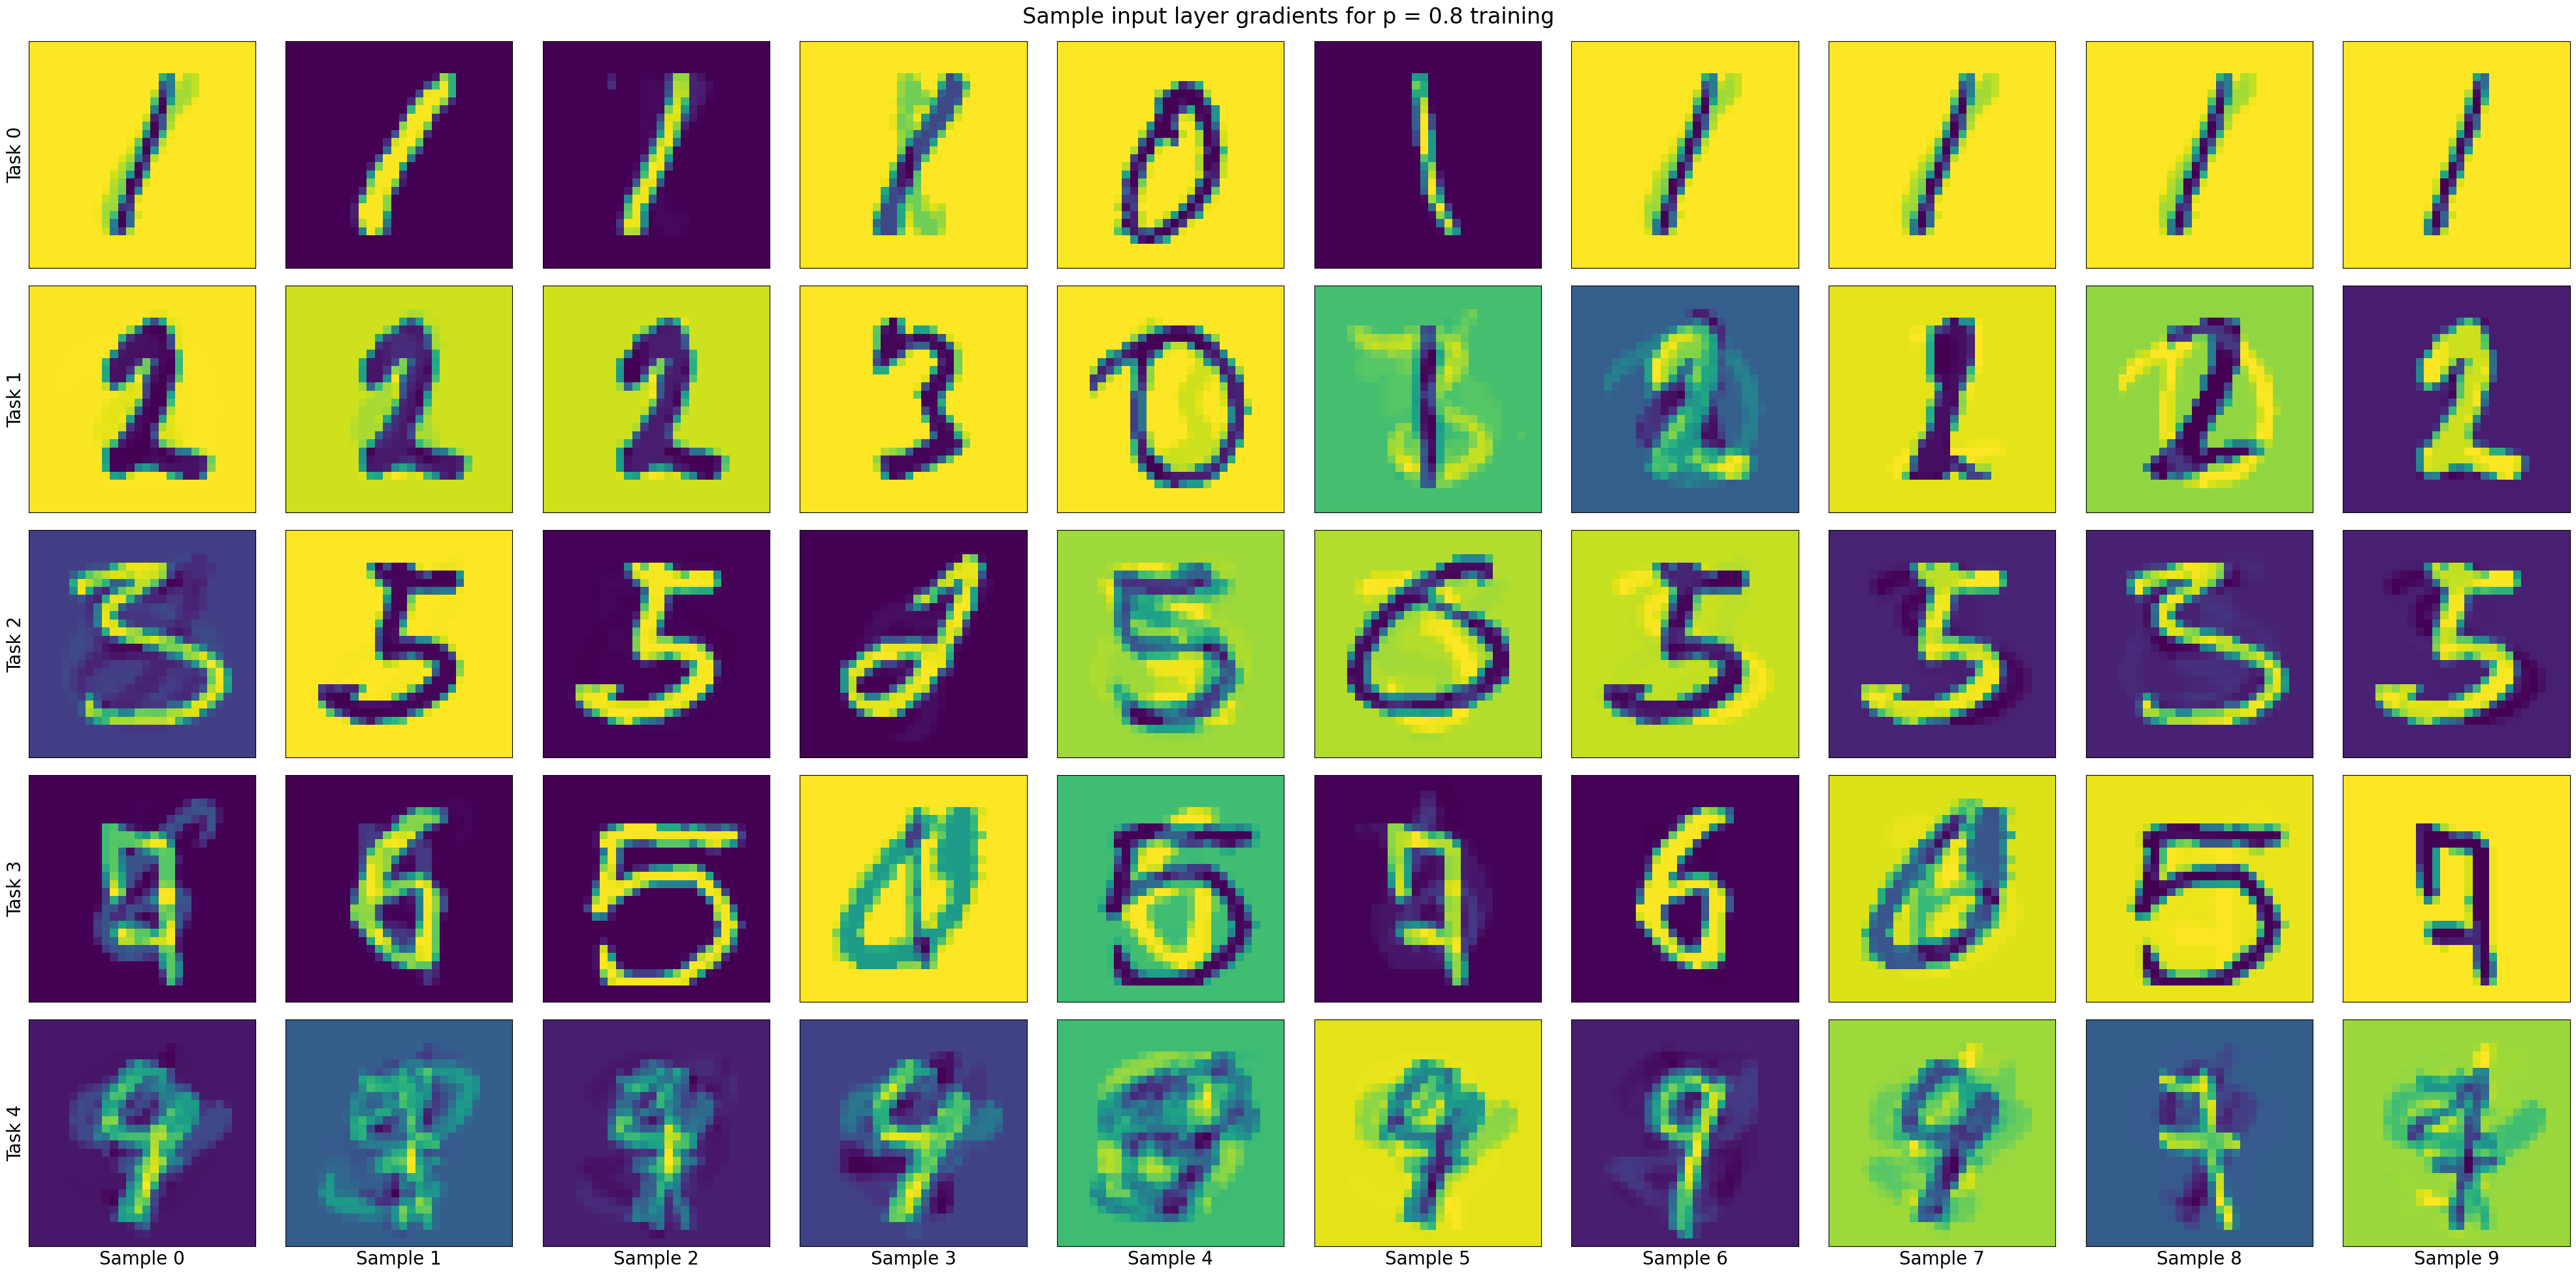

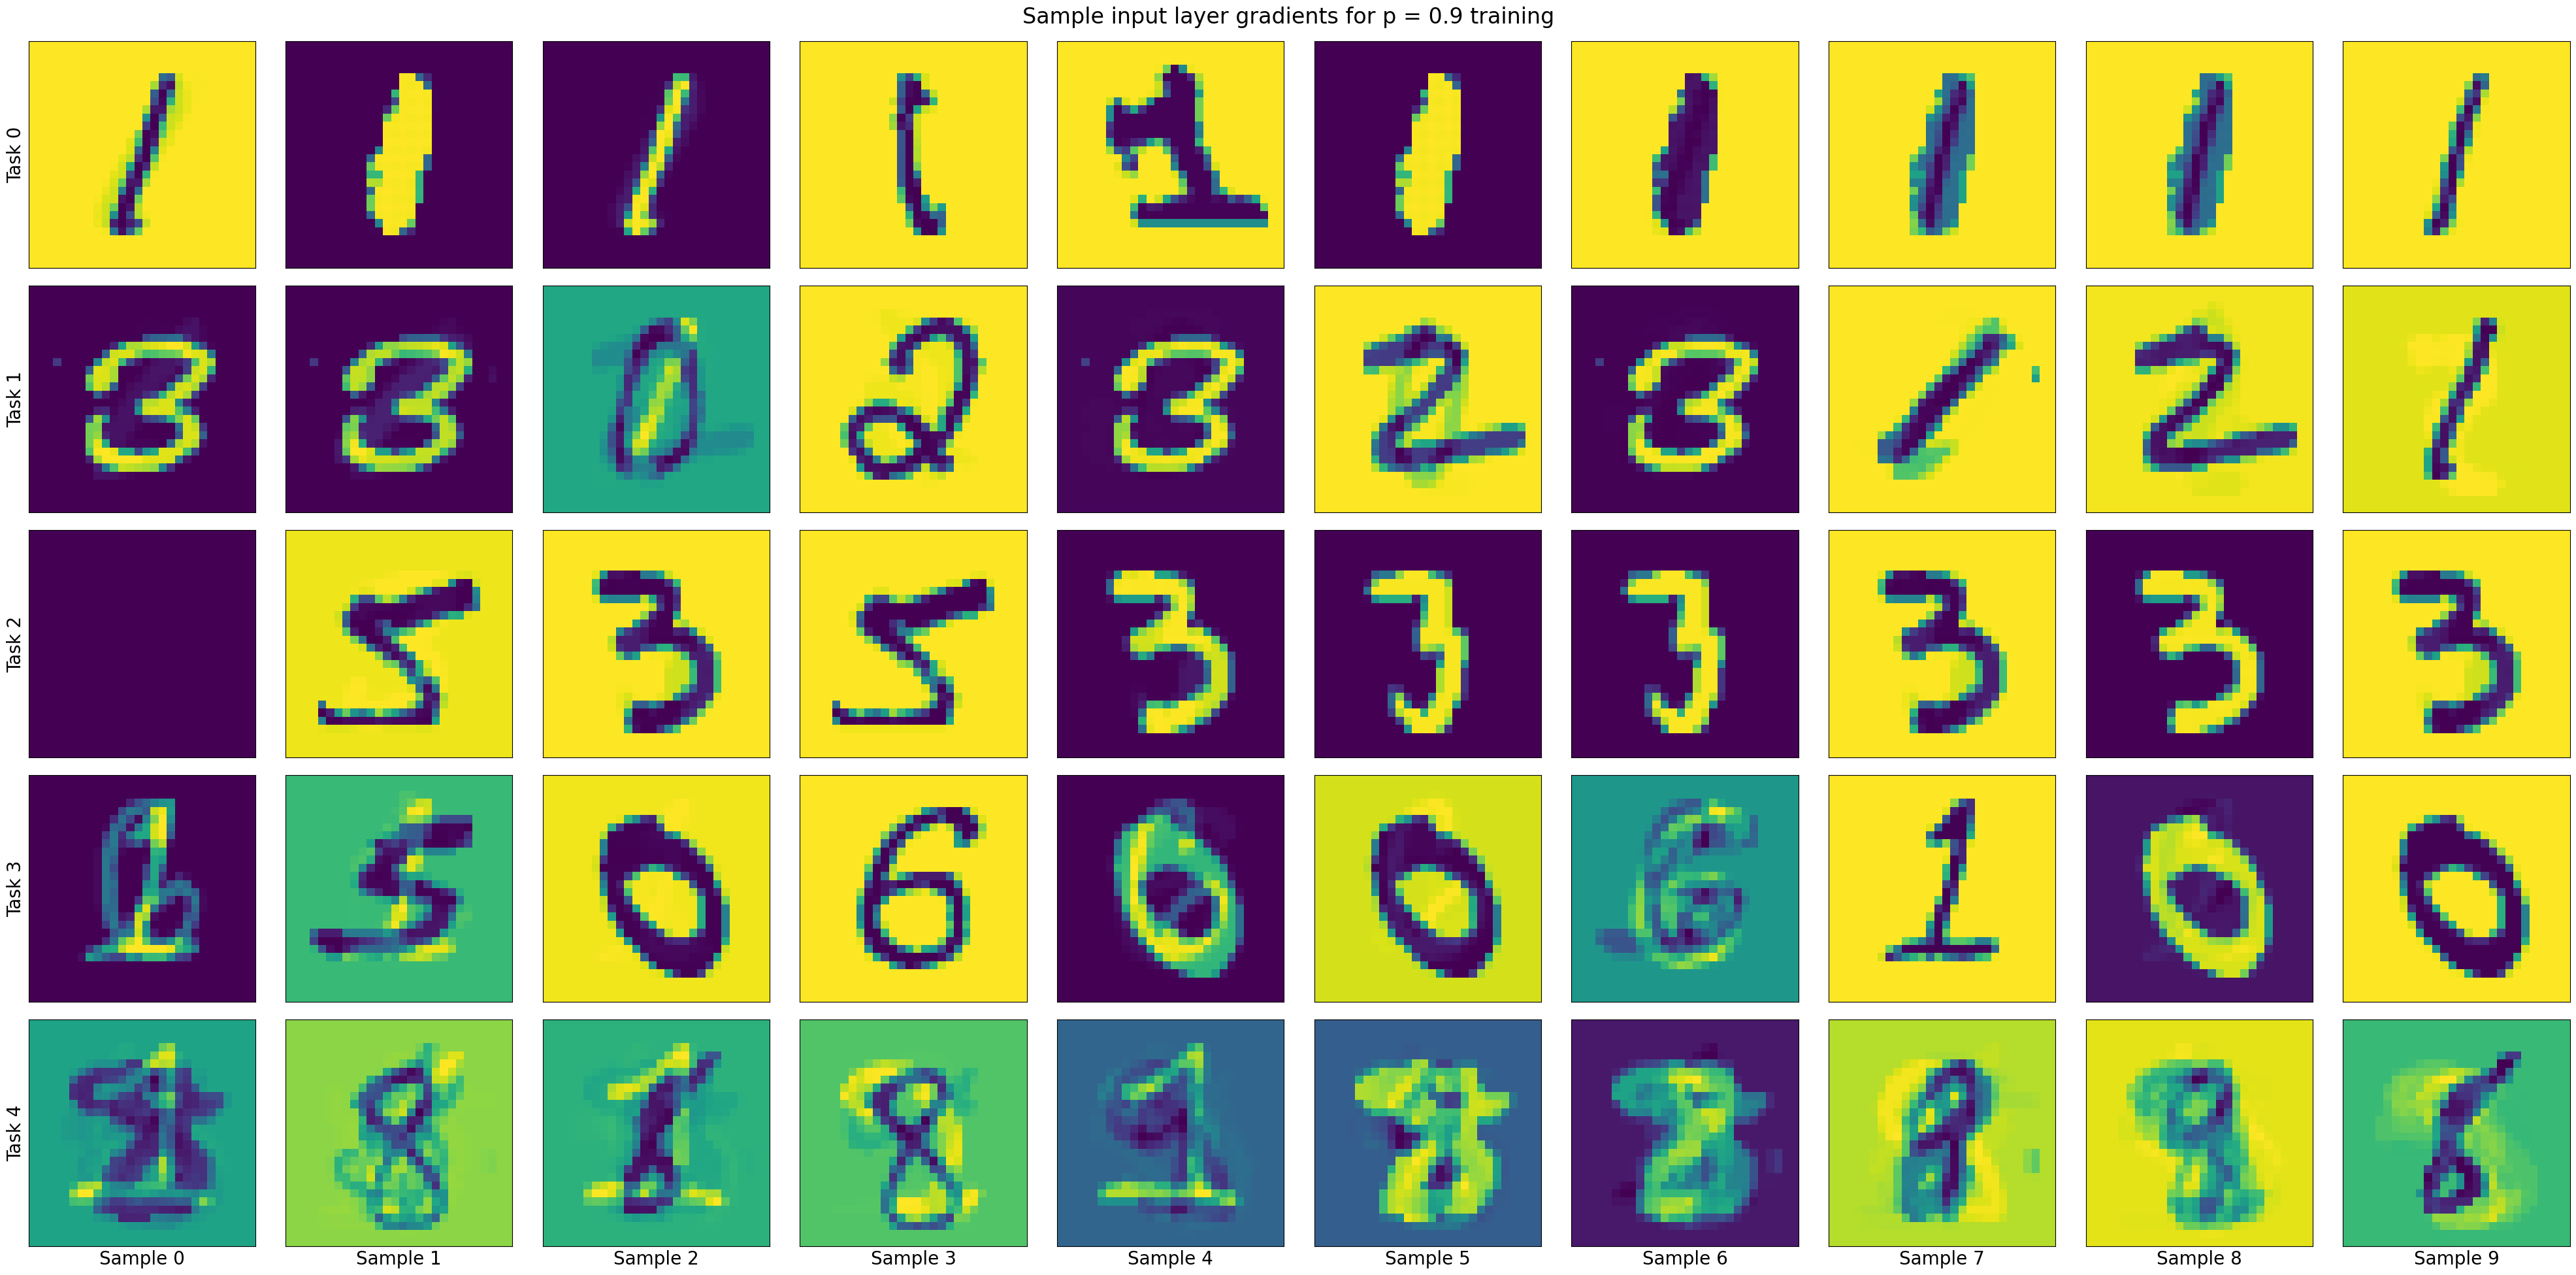

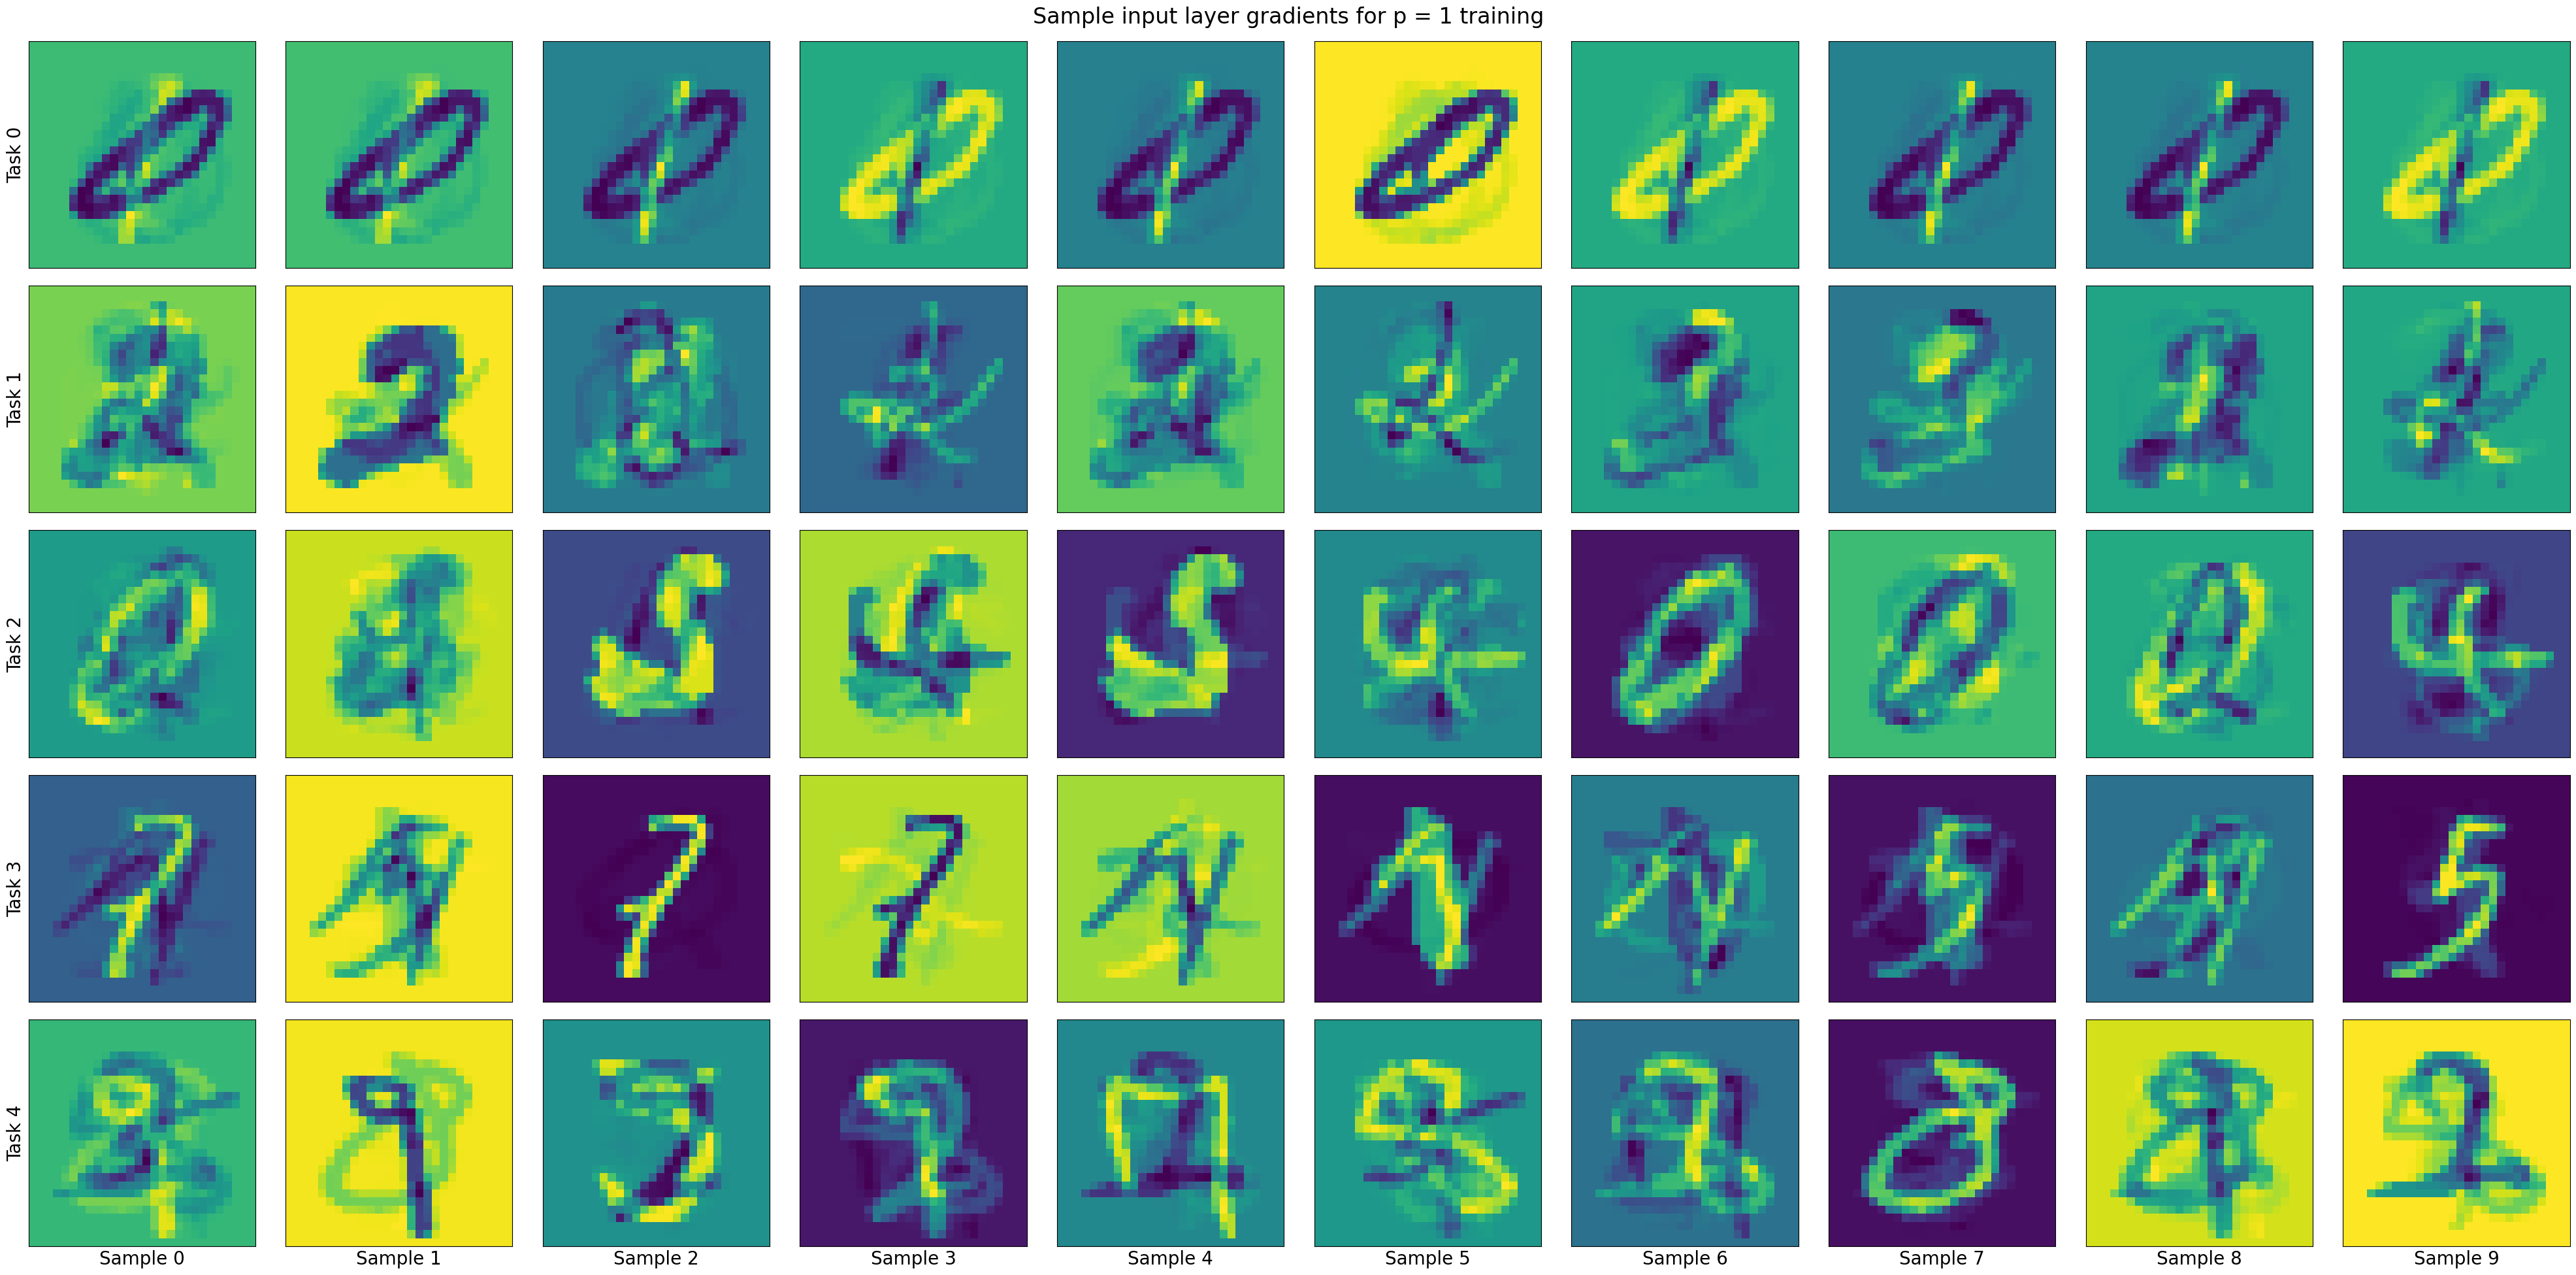

In [14]:
for p in [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    visualize_gradients(f'models/mnist_split/{p}/train', p, show = False)

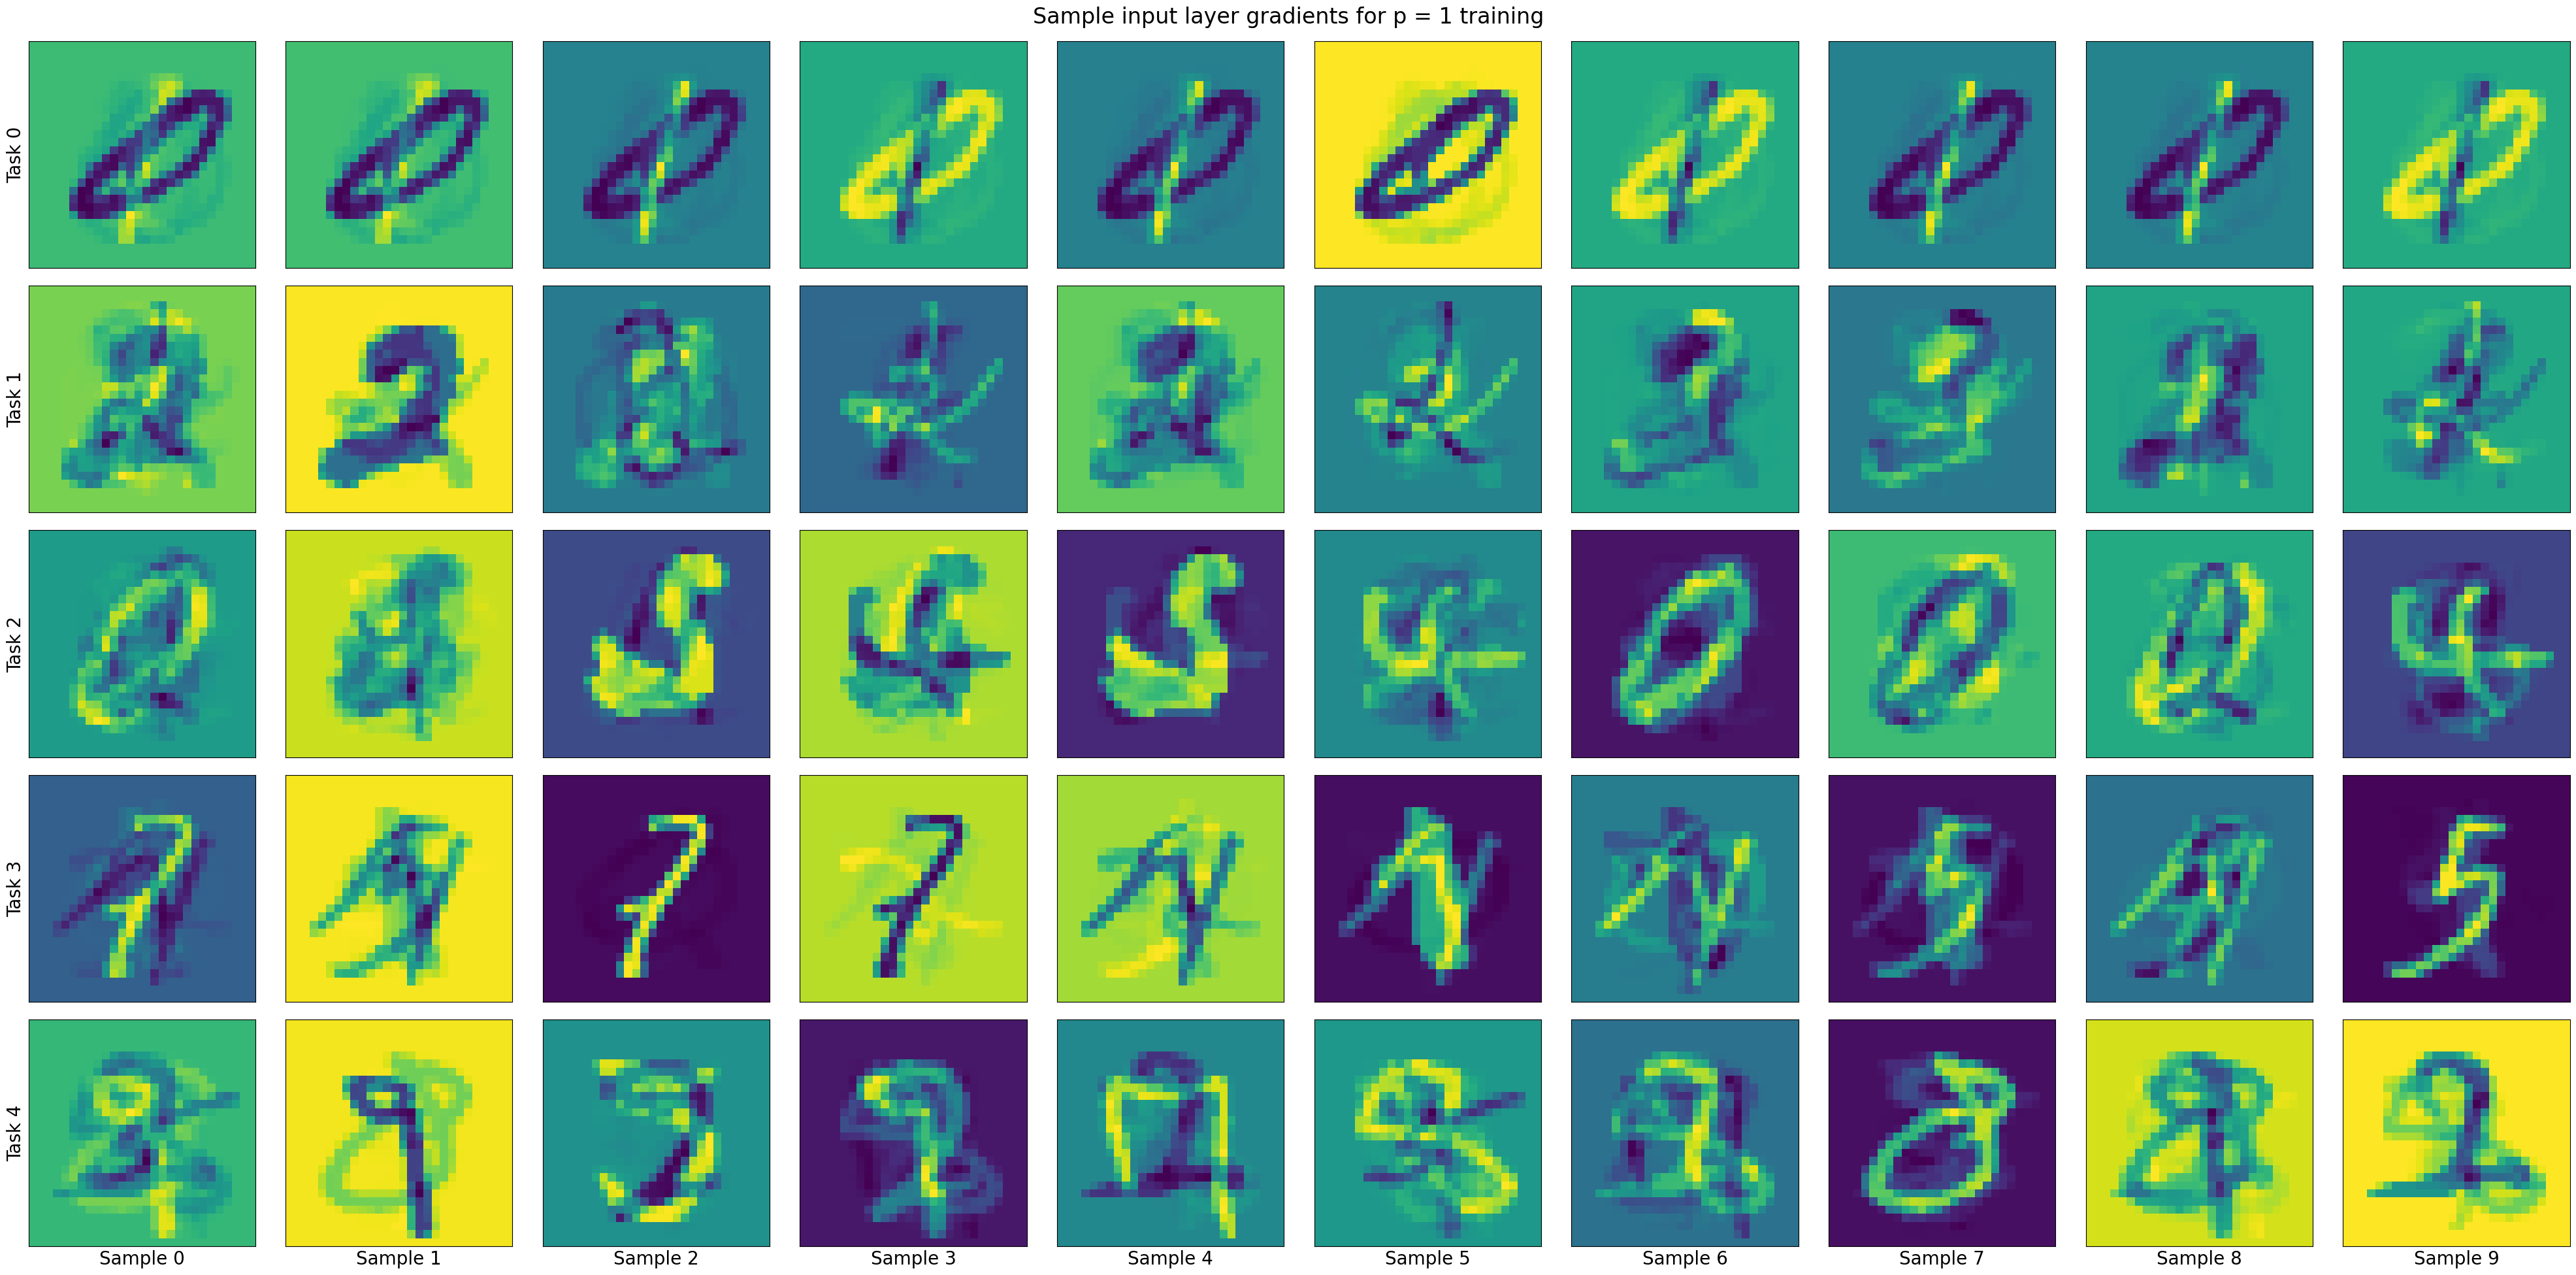

In [8]:
visualize_gradients('models/mnist_split/1/train', 1)

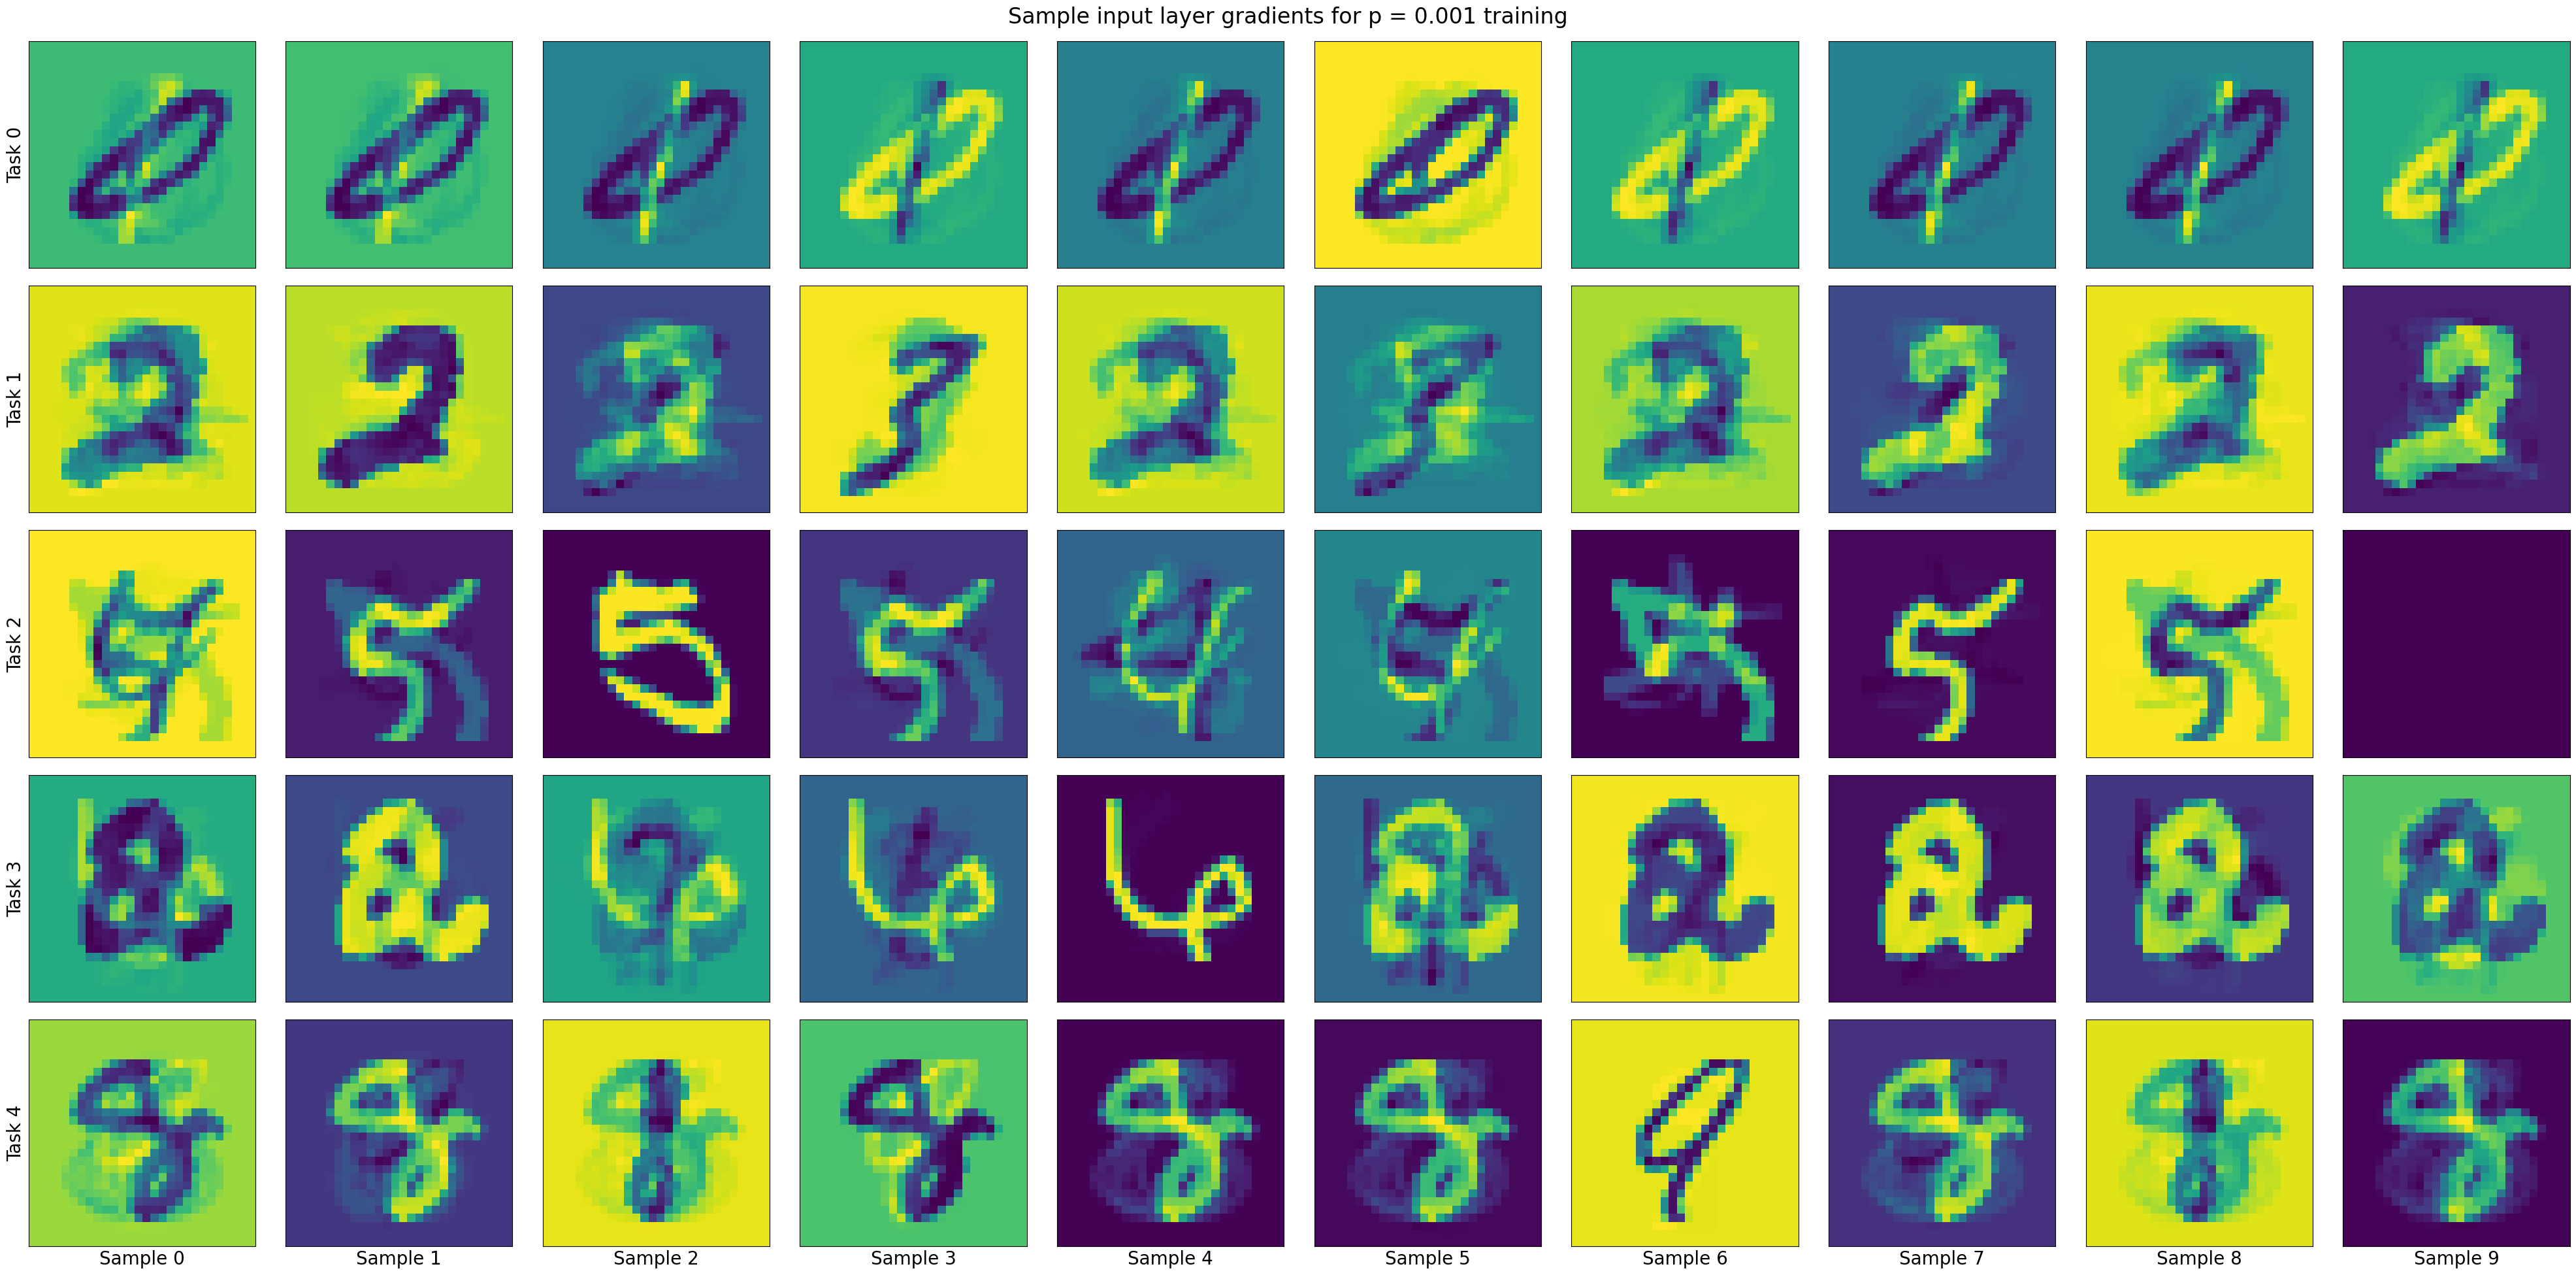

In [9]:
visualize_gradients('models/mnist_split/0.001/train', 0.001)

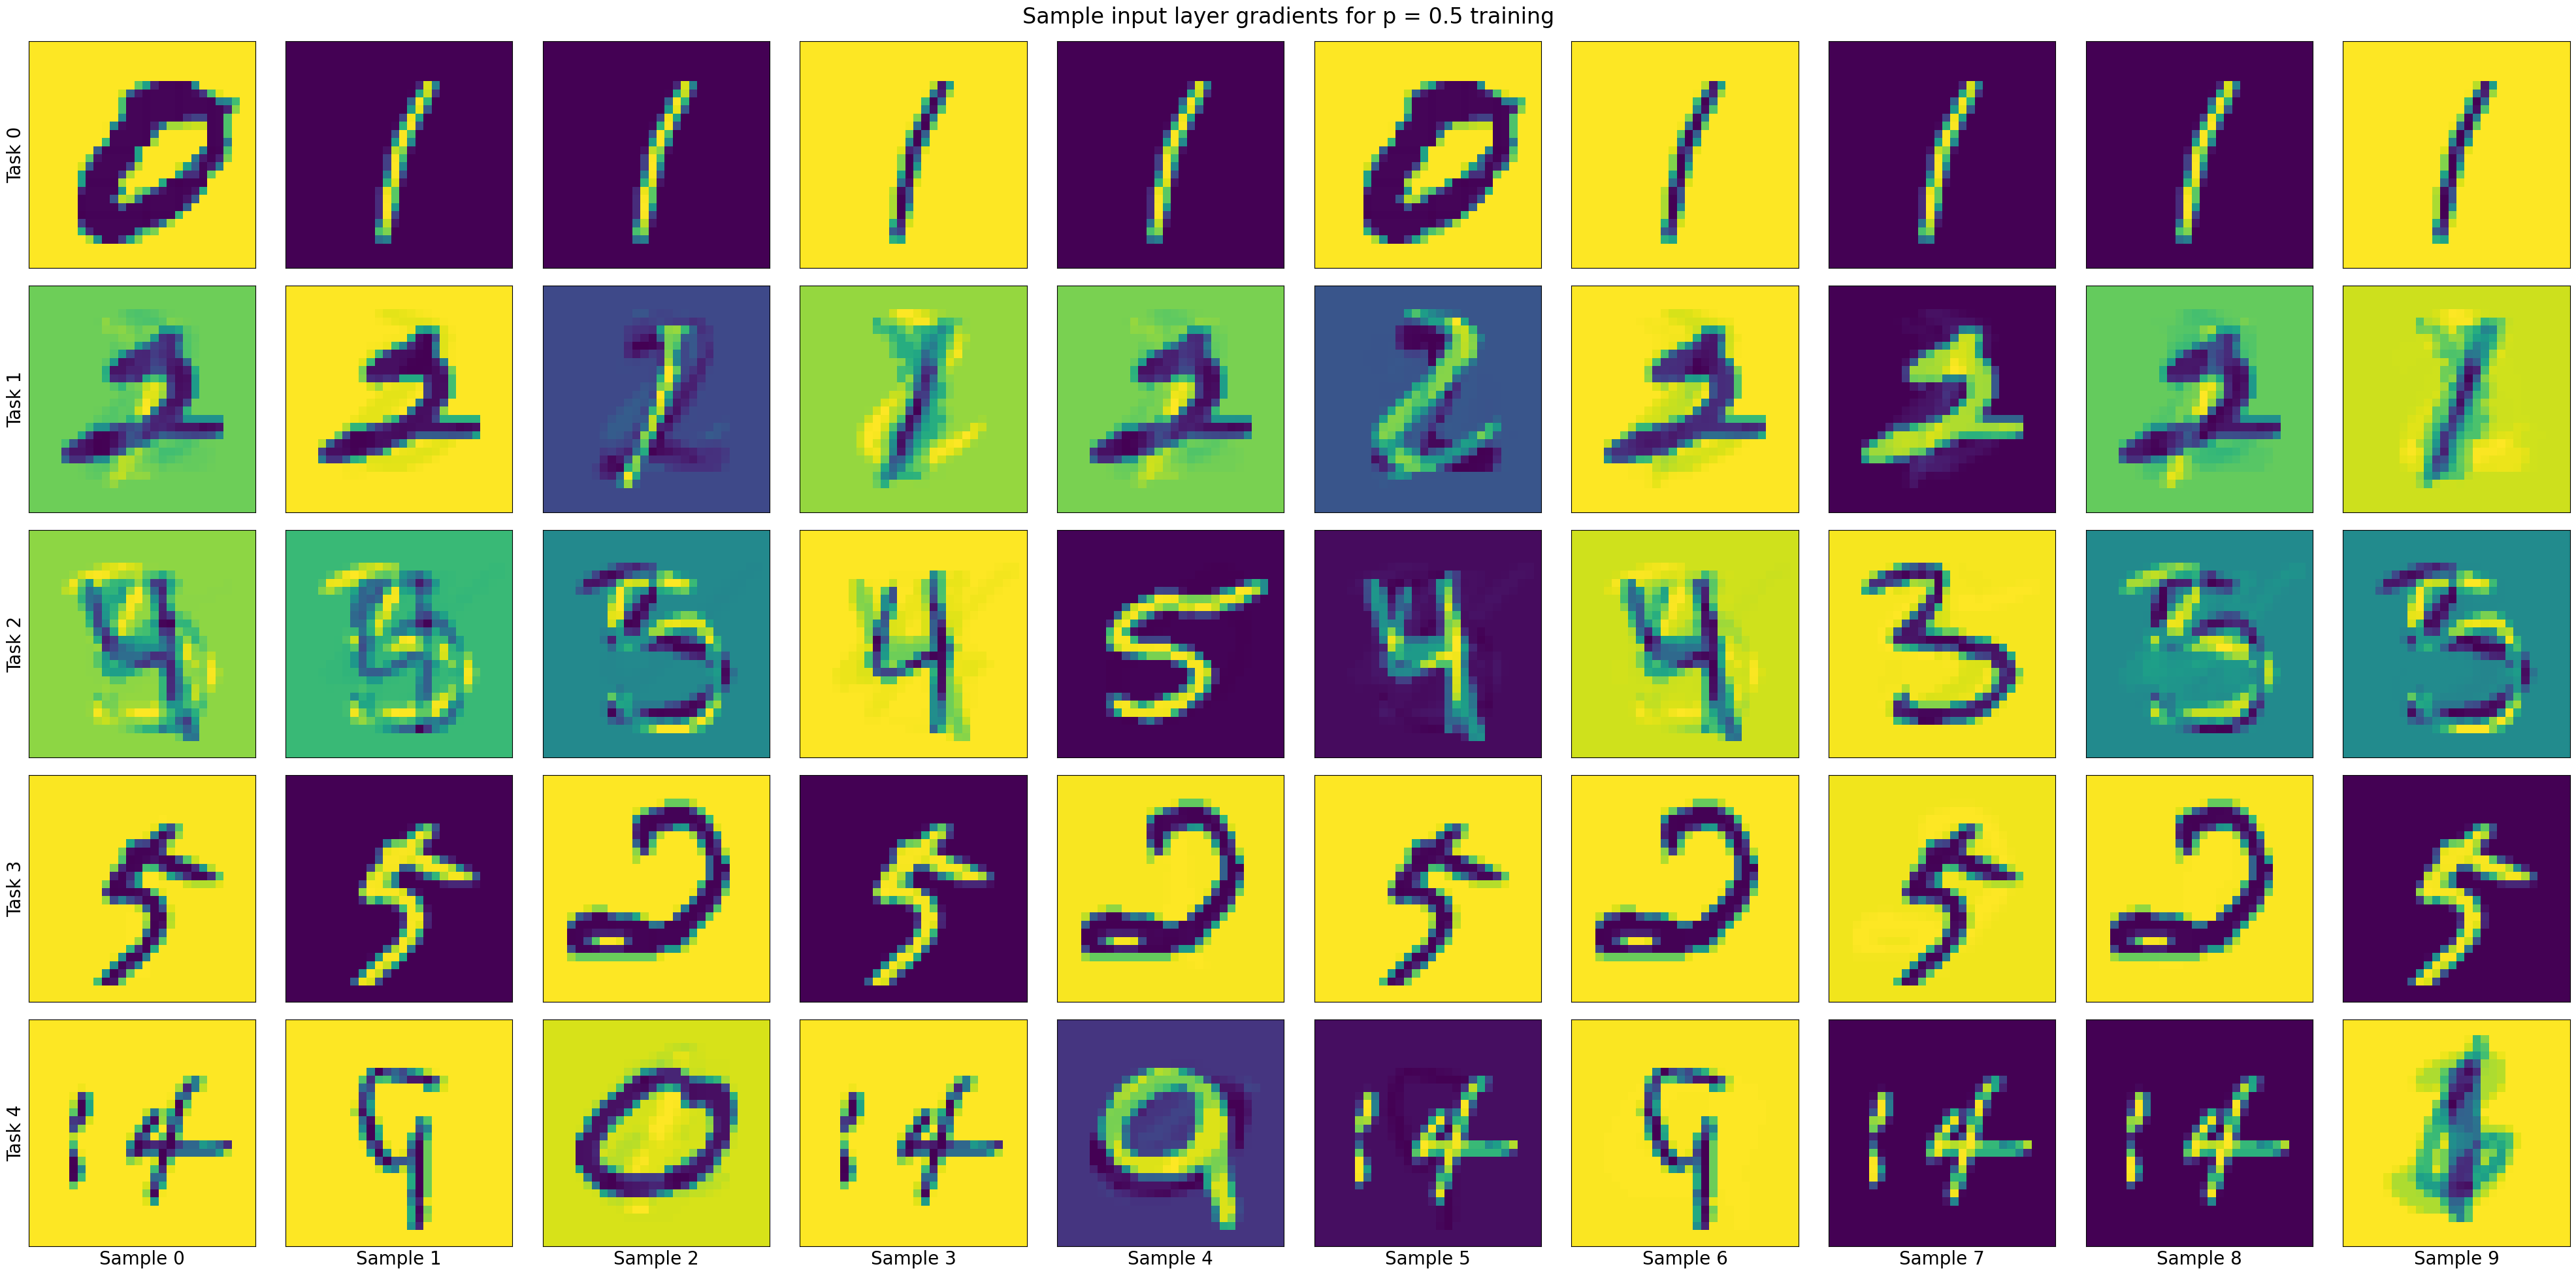

In [12]:
visualize_gradients('models/mnist_split/0.5/run_0', 0.5, approx = True)